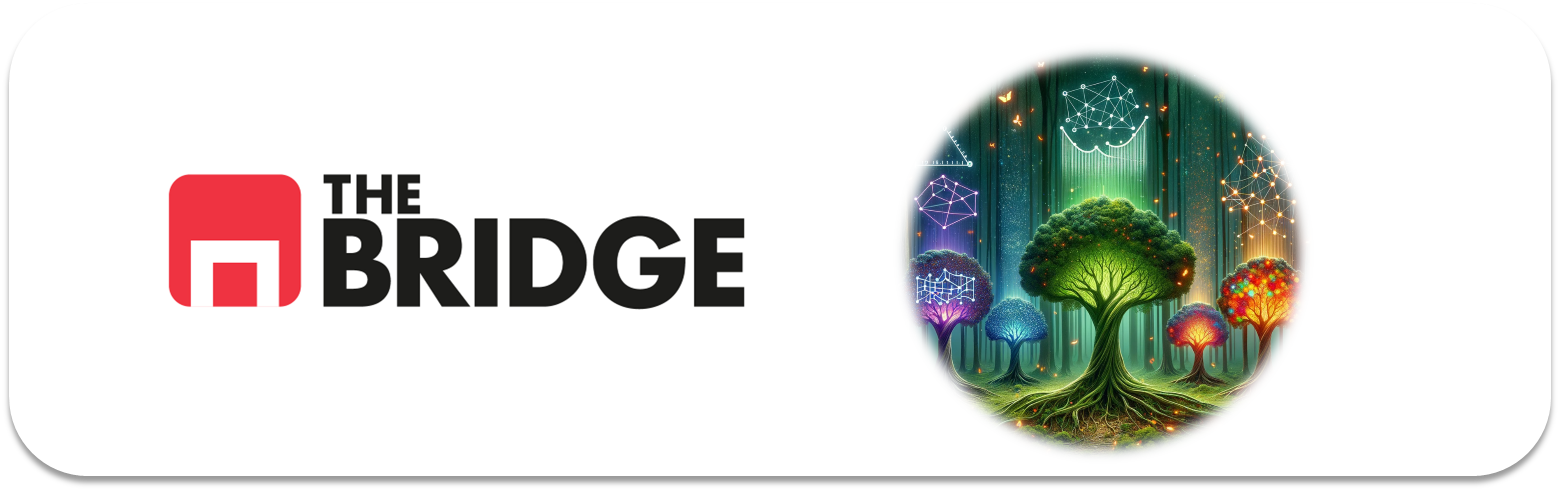

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de Hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# para que la salida de este notebook sea estable en todas las ejecuciones
np.random.seed(42)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 ### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

# Pipeline de ML Supervisado para clasificación - Árboles:


## 1. Carga de datos:

In [2]:
# 1. Cargamos el dataset, le echamos un vistazo, vemos el info, describe, los nulos y tipos
# y veo si hay duplicados también::
df_bank = pd.read_csv('./data/bank-full.csv', sep=';')
df_bank.head(20)  

age           job   marital  education default  balance housing loan  \
0    58    management   married   tertiary      no     2143     yes   no   
1    44    technician    single  secondary      no       29     yes   no   
2    33  entrepreneur   married  secondary      no        2     yes  yes   
3    47   blue-collar   married    unknown      no     1506     yes   no   
4    33       unknown    single    unknown      no        1      no   no   
5    35    management   married   tertiary      no      231     yes   no   
6    28    management    single   tertiary      no      447     yes  yes   
7    42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8    58       retired   married    primary      no      121     yes   no   
9    43    technician    single  secondary      no      593     yes   no   
10   41        admin.  divorced  secondary      no      270     yes   no   
11   29        admin.    single  secondary      no      390     yes   no   
12   53    technician   married  secondary      no        6     yes   no   
13   58    technician   married    unknown      no       71     yes   no   
14   57      services   married  secondary      no      162     yes   no   
15   51       retired   married    primary      no      229     yes   no   
16   45        admin.    single    unknown      no       13     yes   no   
17   57   blue-collar   married    primary      no       52     yes   no   
18   60       retired   married    primary      no       60     yes   no   
19   33      services   married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0   unknown    5   may       261         1     -1         0  unknown  no  
1   unknown    5   may       151         1     -1         0  unknown  no  
2   unknown    5   may        76         1     -1         0  unknown  no  
3   unknown    5   may        92         1     -1         0  unknown  no  
4   unknown    5   may       198         1     -1         0  unknown  no  
5   unknown    5   may       139         1     -1         0  unknown  no  
6   unknown    5   may       217         1     -1         0  unknown  no  
7   unknown    5   may       380         1     -1         0  unknown  no  
8   unknown    5   may        50         1     -1         0  unknown  no  
9   unknown    5   may        55         1     -1         0  unknown  no  
10  unknown    5   may       222         1     -1         0  unknown  no  
11  unknown    5   may       137         1     -1         0  unknown  no  
12  unknown    5   may       517         1     -1         0  unknown  no  
13  unknown    5   may        71         1     -1         0  unknown  no  
14  unknown    5   may       174         1     -1         0  unknown  no  
15  unknown    5   may       353         1     -1         0  unknown  no  
16  unknown    5   may        98         1     -1         0  unknown  no  
17  unknown    5   may        38         1     -1         0  unknown  no  
18  unknown    5   may       219         1     -1         0  unknown  no  
19  unknown    5   may        54         1     -1         0  unknown  no

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df_bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [6]:
df_bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
df_bank.isnull().sum() # no hay nulos, igual los vi en el info, pero por si acaso los doble-reviso con este método.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df_bank.duplicated().sum() # tampoco hay filas duplicadas, así que no tengo que eliminar ninguna.

np.int64(0)

## 2. Elección de target:
Al ser un target categórico, va a ser un modelo de clasificación, regresión logística. Elegimos el target primero, y excluimos algunas si lo vemos claro:

In [3]:
# 2. Elegimos el target:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
# Nuestro problema a resolver es saber si el cliente se suscribe a un depósito a largo plazo.
# De todas las columnas, la 'y' es la que tiene esta info, tiene nuestra respuesta yes/no:
# entonces 'y' es nuestro target.
df_bank['y'].value_counts(dropna=False)

y
no     39922
yes     5289
Name: count, dtype: int64

In [5]:
# para convertir el target a numérico, voy a usar map, pero también voy a limpiarlo
# ya que puede haber espacios en blanco o mayúsculas:
df_bank['y'] = df_bank['y'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

In [6]:
df_bank['y'].value_counts(dropna=False)

y
0    39922
1     5289
Name: count, dtype: int64

In [13]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [14]:
df_bank['y'].isna().sum()

np.int64(0)

In [7]:
target = 'y'

## 3. Train/Test split:
Ya que no tenemos nulos en ninguna, vamos a dividir usando train_test_split:


In [8]:
train_set, test_set = train_test_split(df_bank, test_size= 0.2, stratify= df_bank["y"], random_state= 42)

In [9]:
# comprobamos que el split se hizo bien, y que la proporción de yes/no se mantiene en ambos sets:
train_set['y'].value_counts(normalize= True)

y
0    0.883018
1    0.116982
Name: proportion, dtype: float64

In [10]:
test_set['y'].value_counts(normalize= True)

y
0    0.883003
1    0.116997
Name: proportion, dtype: float64

In [11]:
train_set.info() # vemos si falta algo en el train_set.

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 24001 to 44229
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.0+ MB


In [12]:
test_set.info() # tampoco falta nada en el test_set, todo parece correcto.
# no tenemos que hacer imputación de nulos ni nada, así que seguimos adelante.

<class 'pandas.core.frame.DataFrame'>
Index: 9043 entries, 1392 to 31033
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9043 non-null   int64 
 1   job        9043 non-null   object
 2   marital    9043 non-null   object
 3   education  9043 non-null   object
 4   default    9043 non-null   object
 5   balance    9043 non-null   int64 
 6   housing    9043 non-null   object
 7   loan       9043 non-null   object
 8   contact    9043 non-null   object
 9   day        9043 non-null   int64 
 10  month      9043 non-null   object
 11  duration   9043 non-null   int64 
 12  campaign   9043 non-null   int64 
 13  pdays      9043 non-null   int64 
 14  previous   9043 non-null   int64 
 15  poutcome   9043 non-null   object
 16  y          9043 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 1.2+ MB


## 4. Mini-EDA:

In [13]:
# Lo primero en las clasificaciones es ver la distribución de la variable target, 
# y vemos que tenemos un problema de clases desbalanceadas, ya que el 88% de los clientes 
# no se suscriben a un depósito a largo plazo, y sólo el 12% sí lo hacen. 
train_set[target].value_counts(normalize= True)

y
0    0.883018
1    0.116982
Name: proportion, dtype: float64

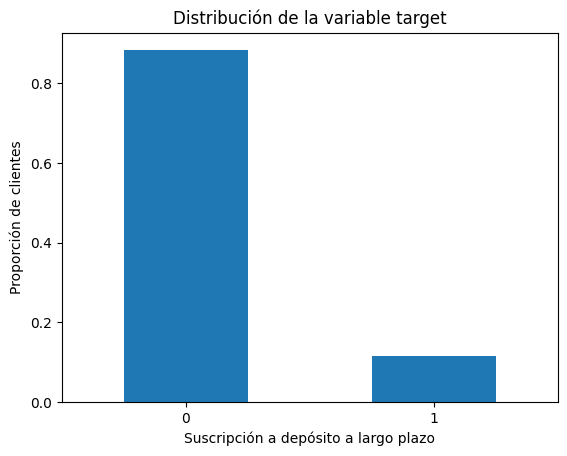

In [22]:
# lo vemos en un plot:
train_set[target].value_counts(normalize= True).plot(kind= 'bar')
plt.title('Distribución de la variable target')
plt.xlabel('Suscripción a depósito a largo plazo')
plt.ylabel('Proporción de clientes')
plt.xticks(rotation= 0)
plt.show();

In [14]:
# Vemos un análisis visual de las numéricas:
features_num = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

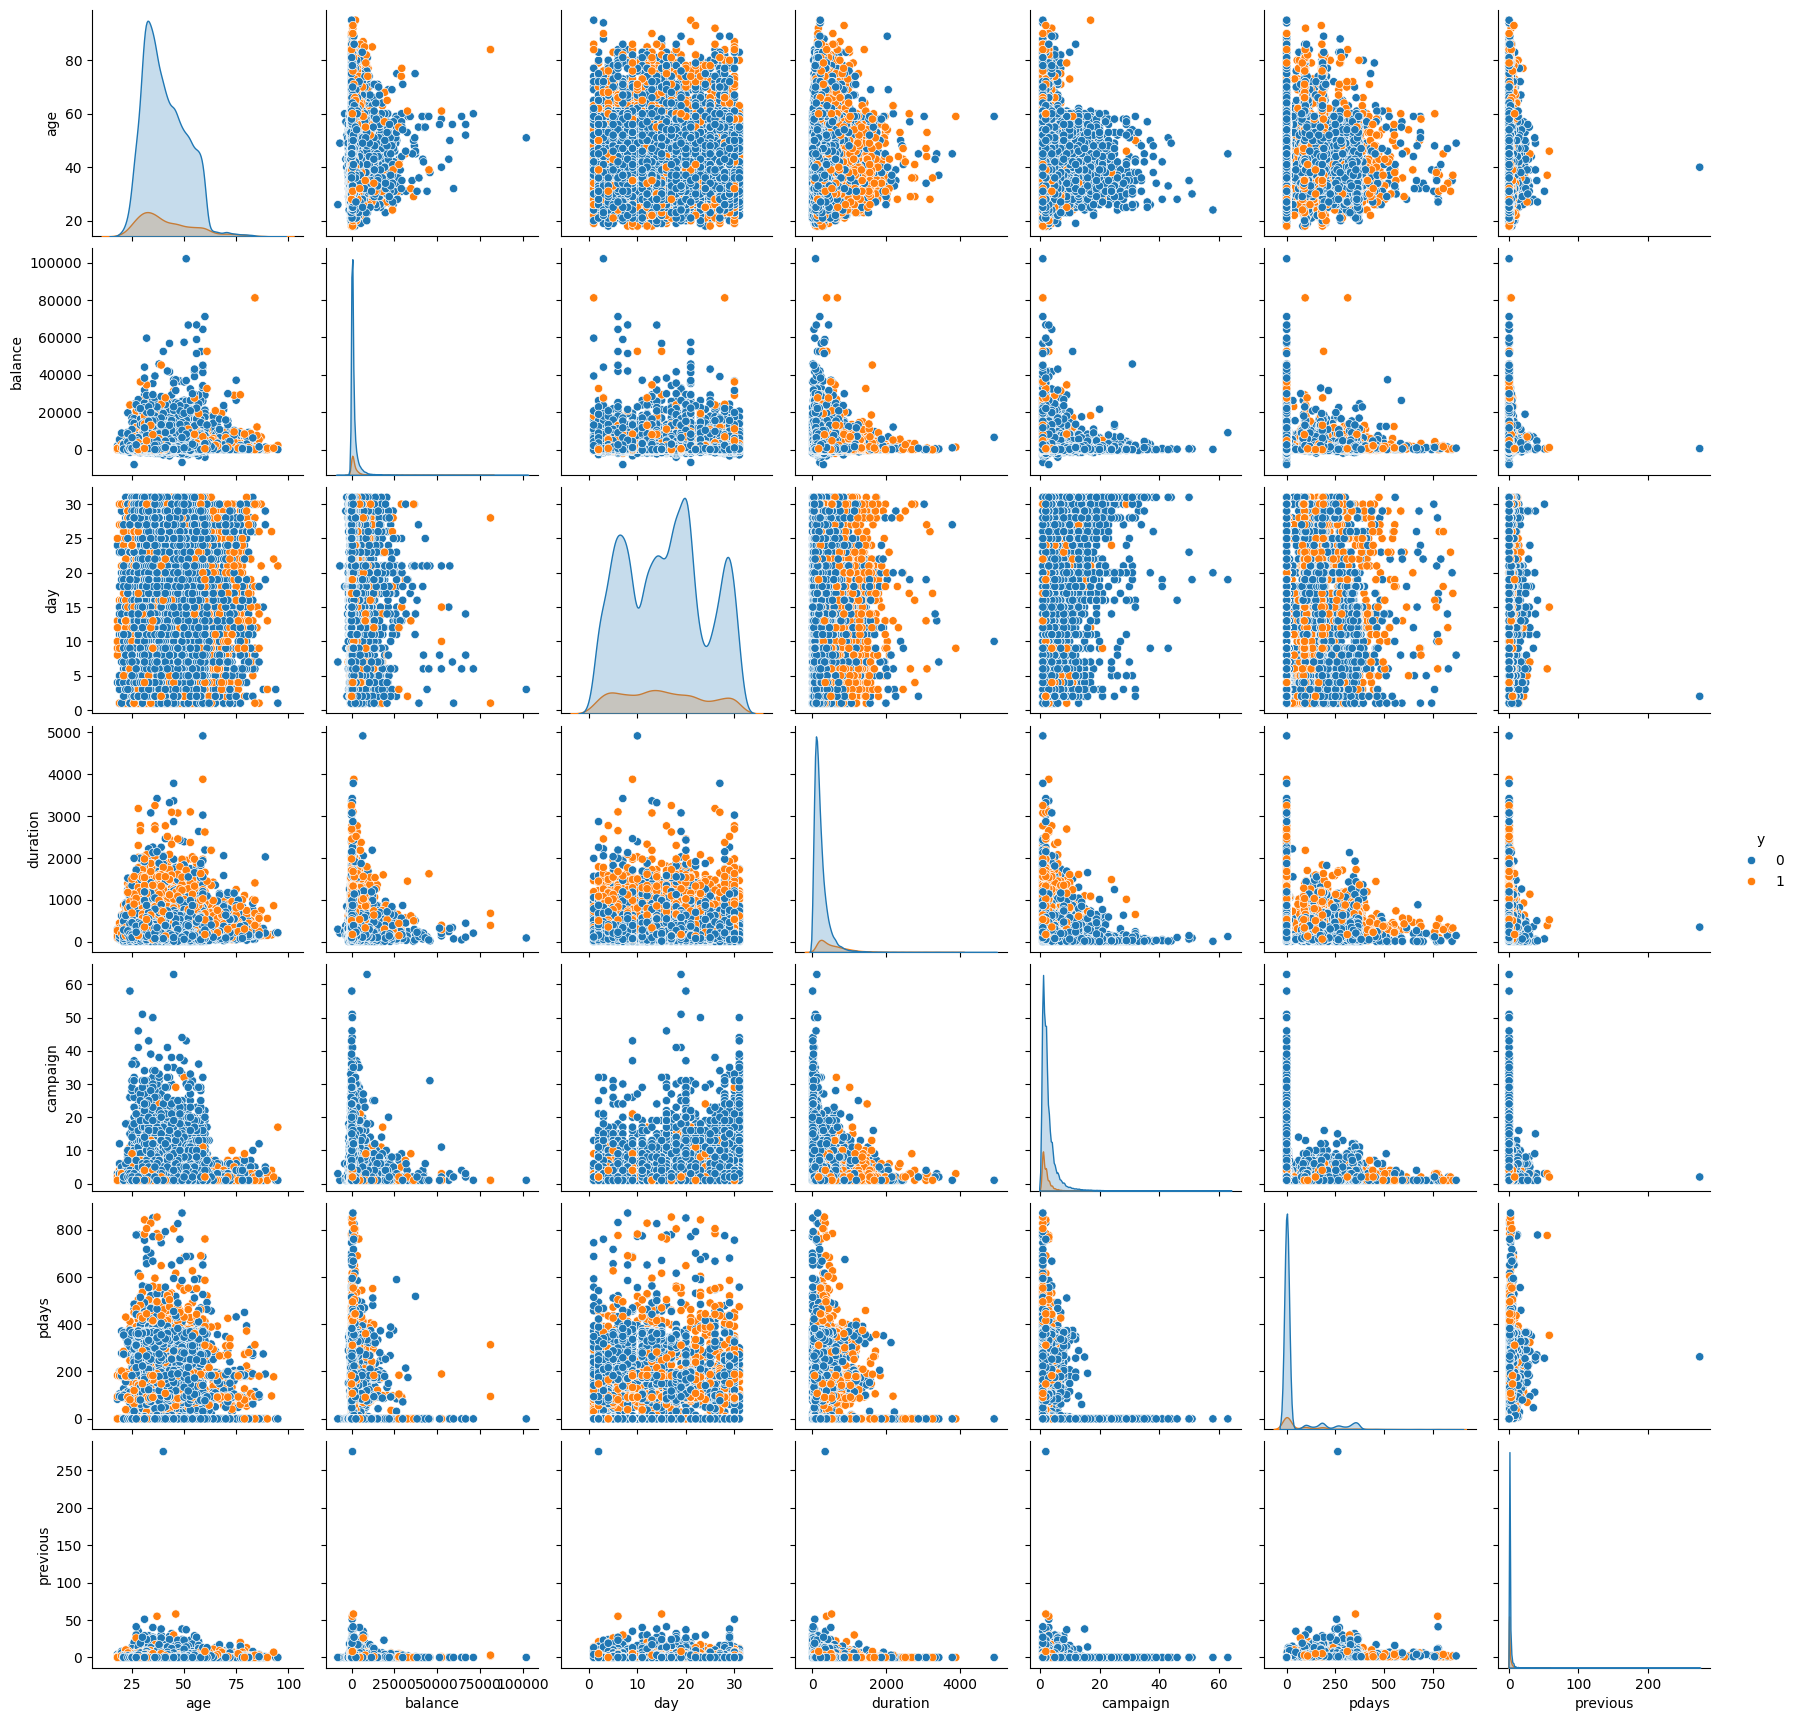

In [24]:
sns.pairplot(train_set[features_num + [target]], hue= target)
plt.show();

In [15]:
# Si analizamos la variable duration, vemos en el plot que a mayor duración de la llamada, más probabilidad de que el 
# cliente se suscriba a un depósito a largo plazo, lo cual tiene sentido, pero esto ya es algo que influye directamente
# en la variable target, y es data leakage, así que no podemos usar esta variable para entrenar el modelo, 
# ya que no es algo que podamos conocer antes de la llamada, sino que es algo que se va a ir conociendo 
train_set['duration'].describe()

count    36168.000000
mean       258.506940
std        259.142445
min          0.000000
25%        103.000000
50%        180.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

In [16]:
# quitamos la variable duration, ya que es data leakage:
features_num = ["age", "balance", "day", "campaign", "pdays", "previous"]

In [17]:
# análisis categóricas: 
features_cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

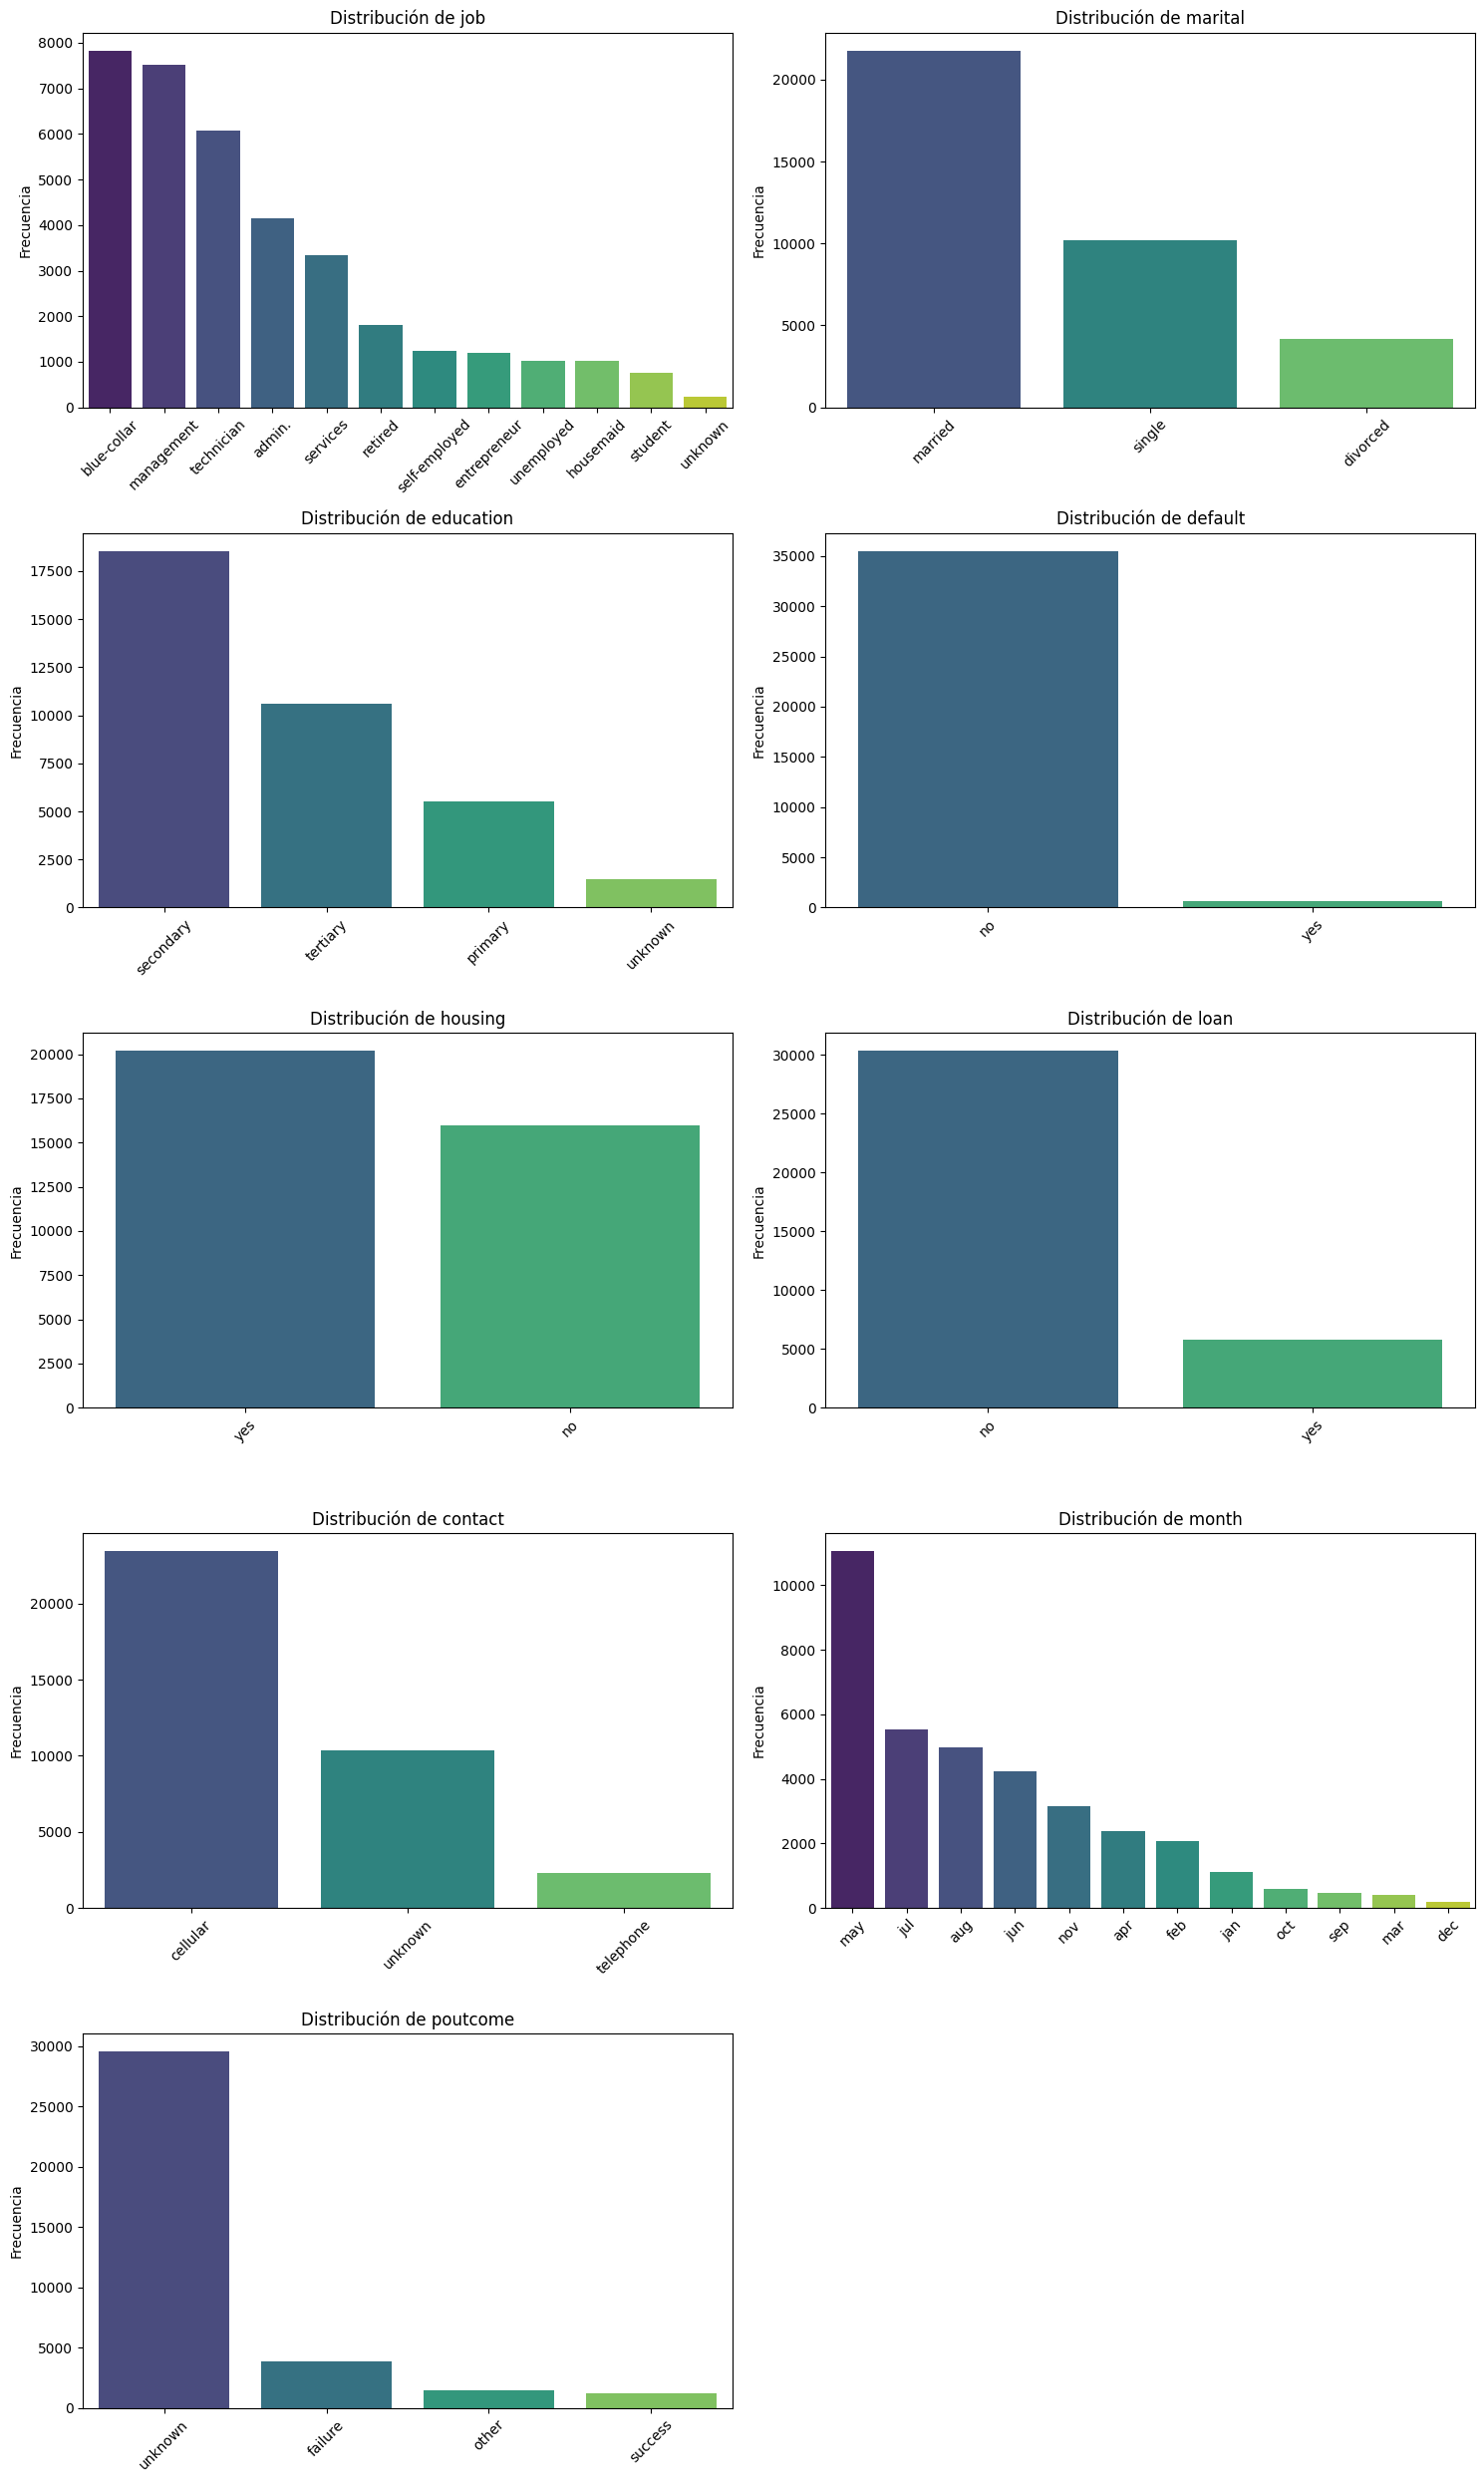

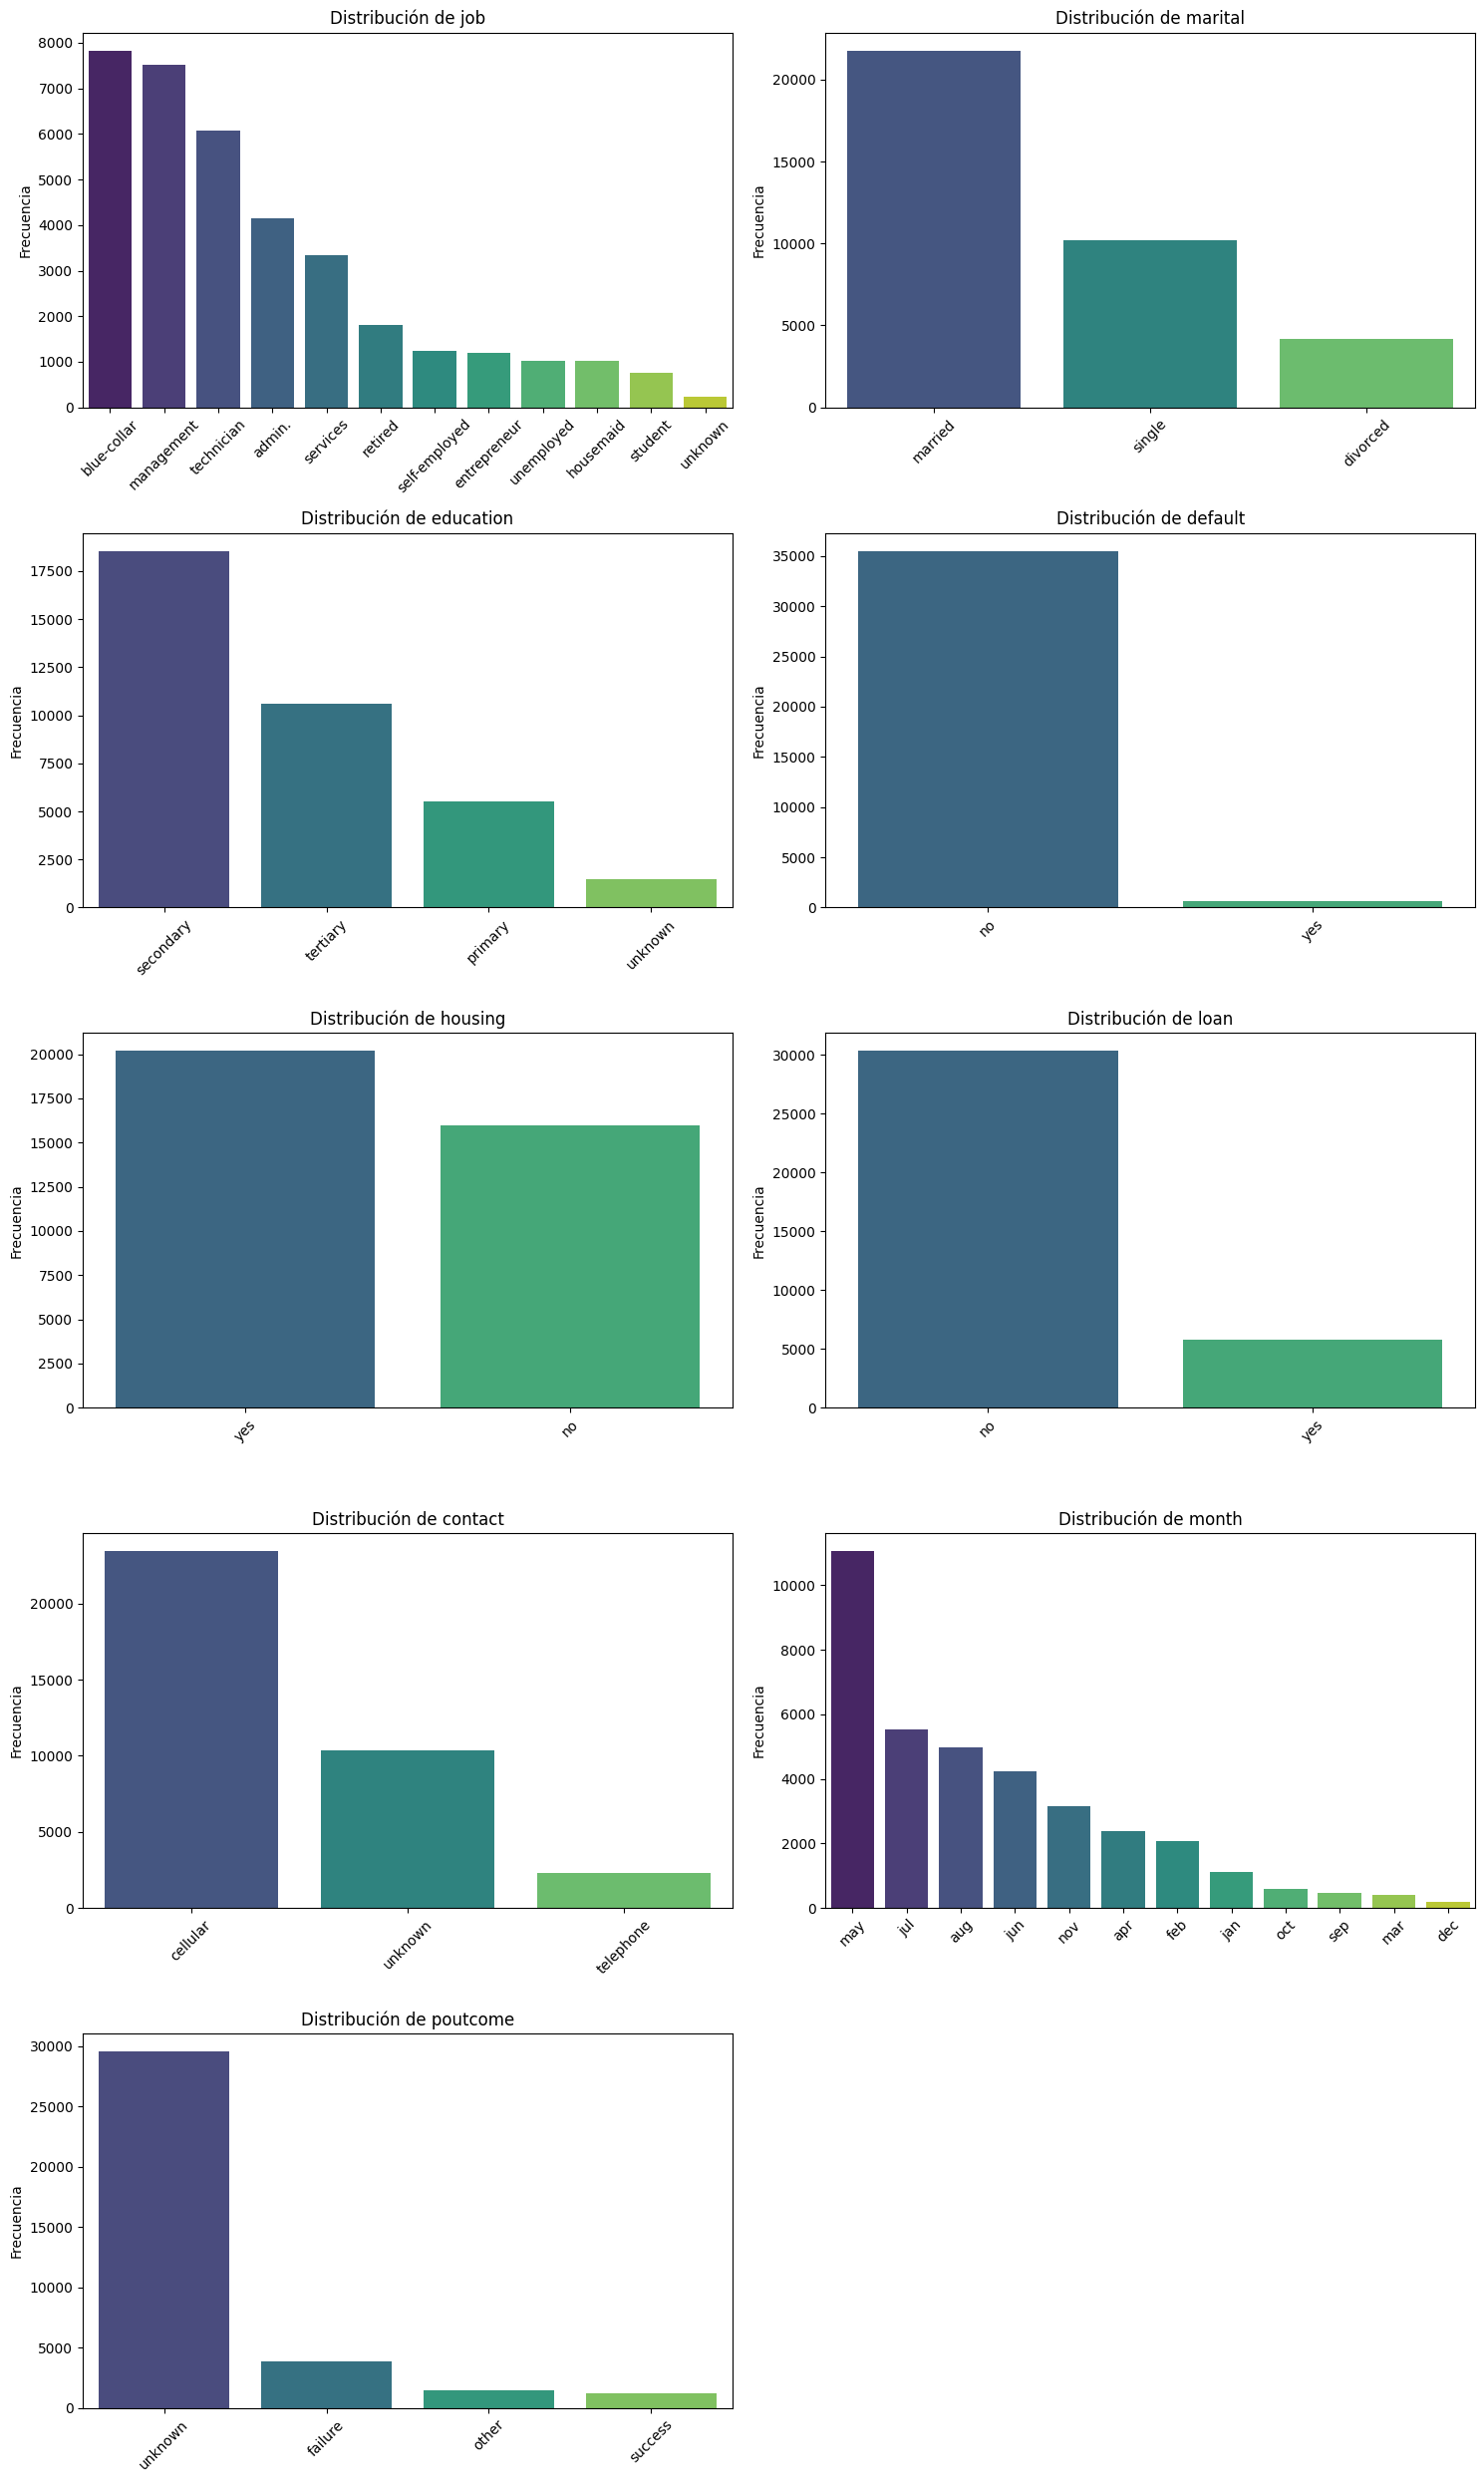

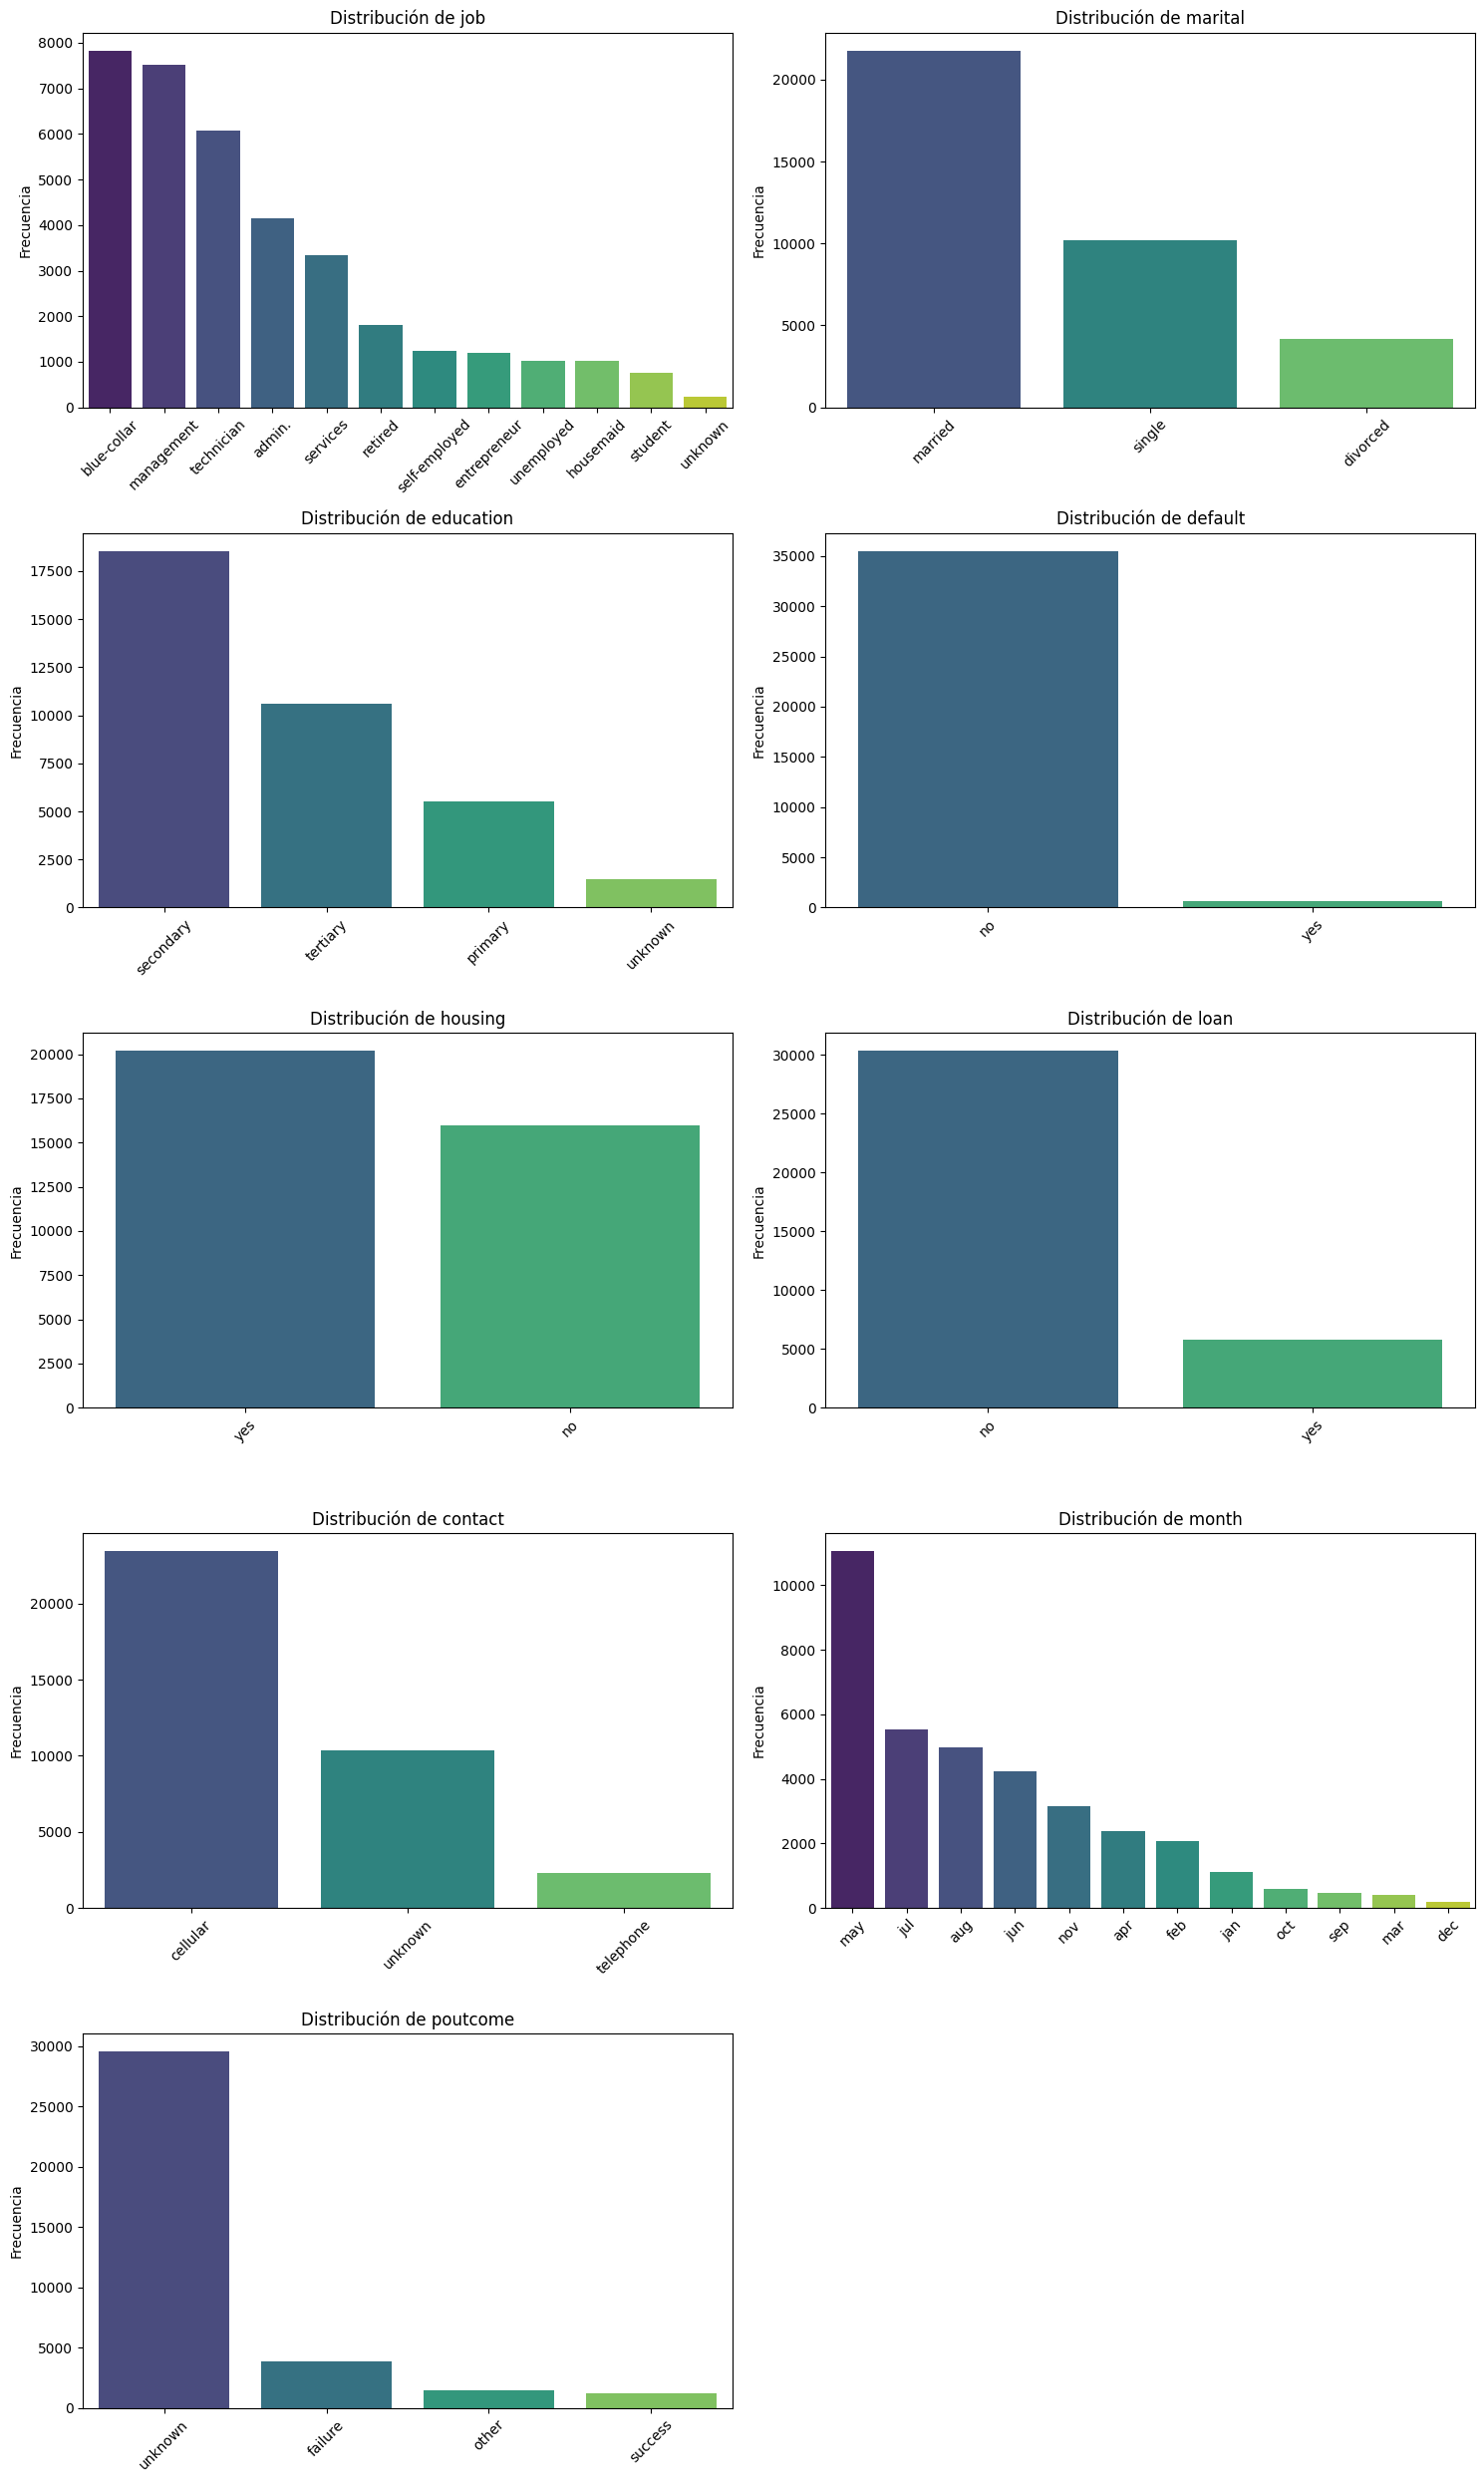

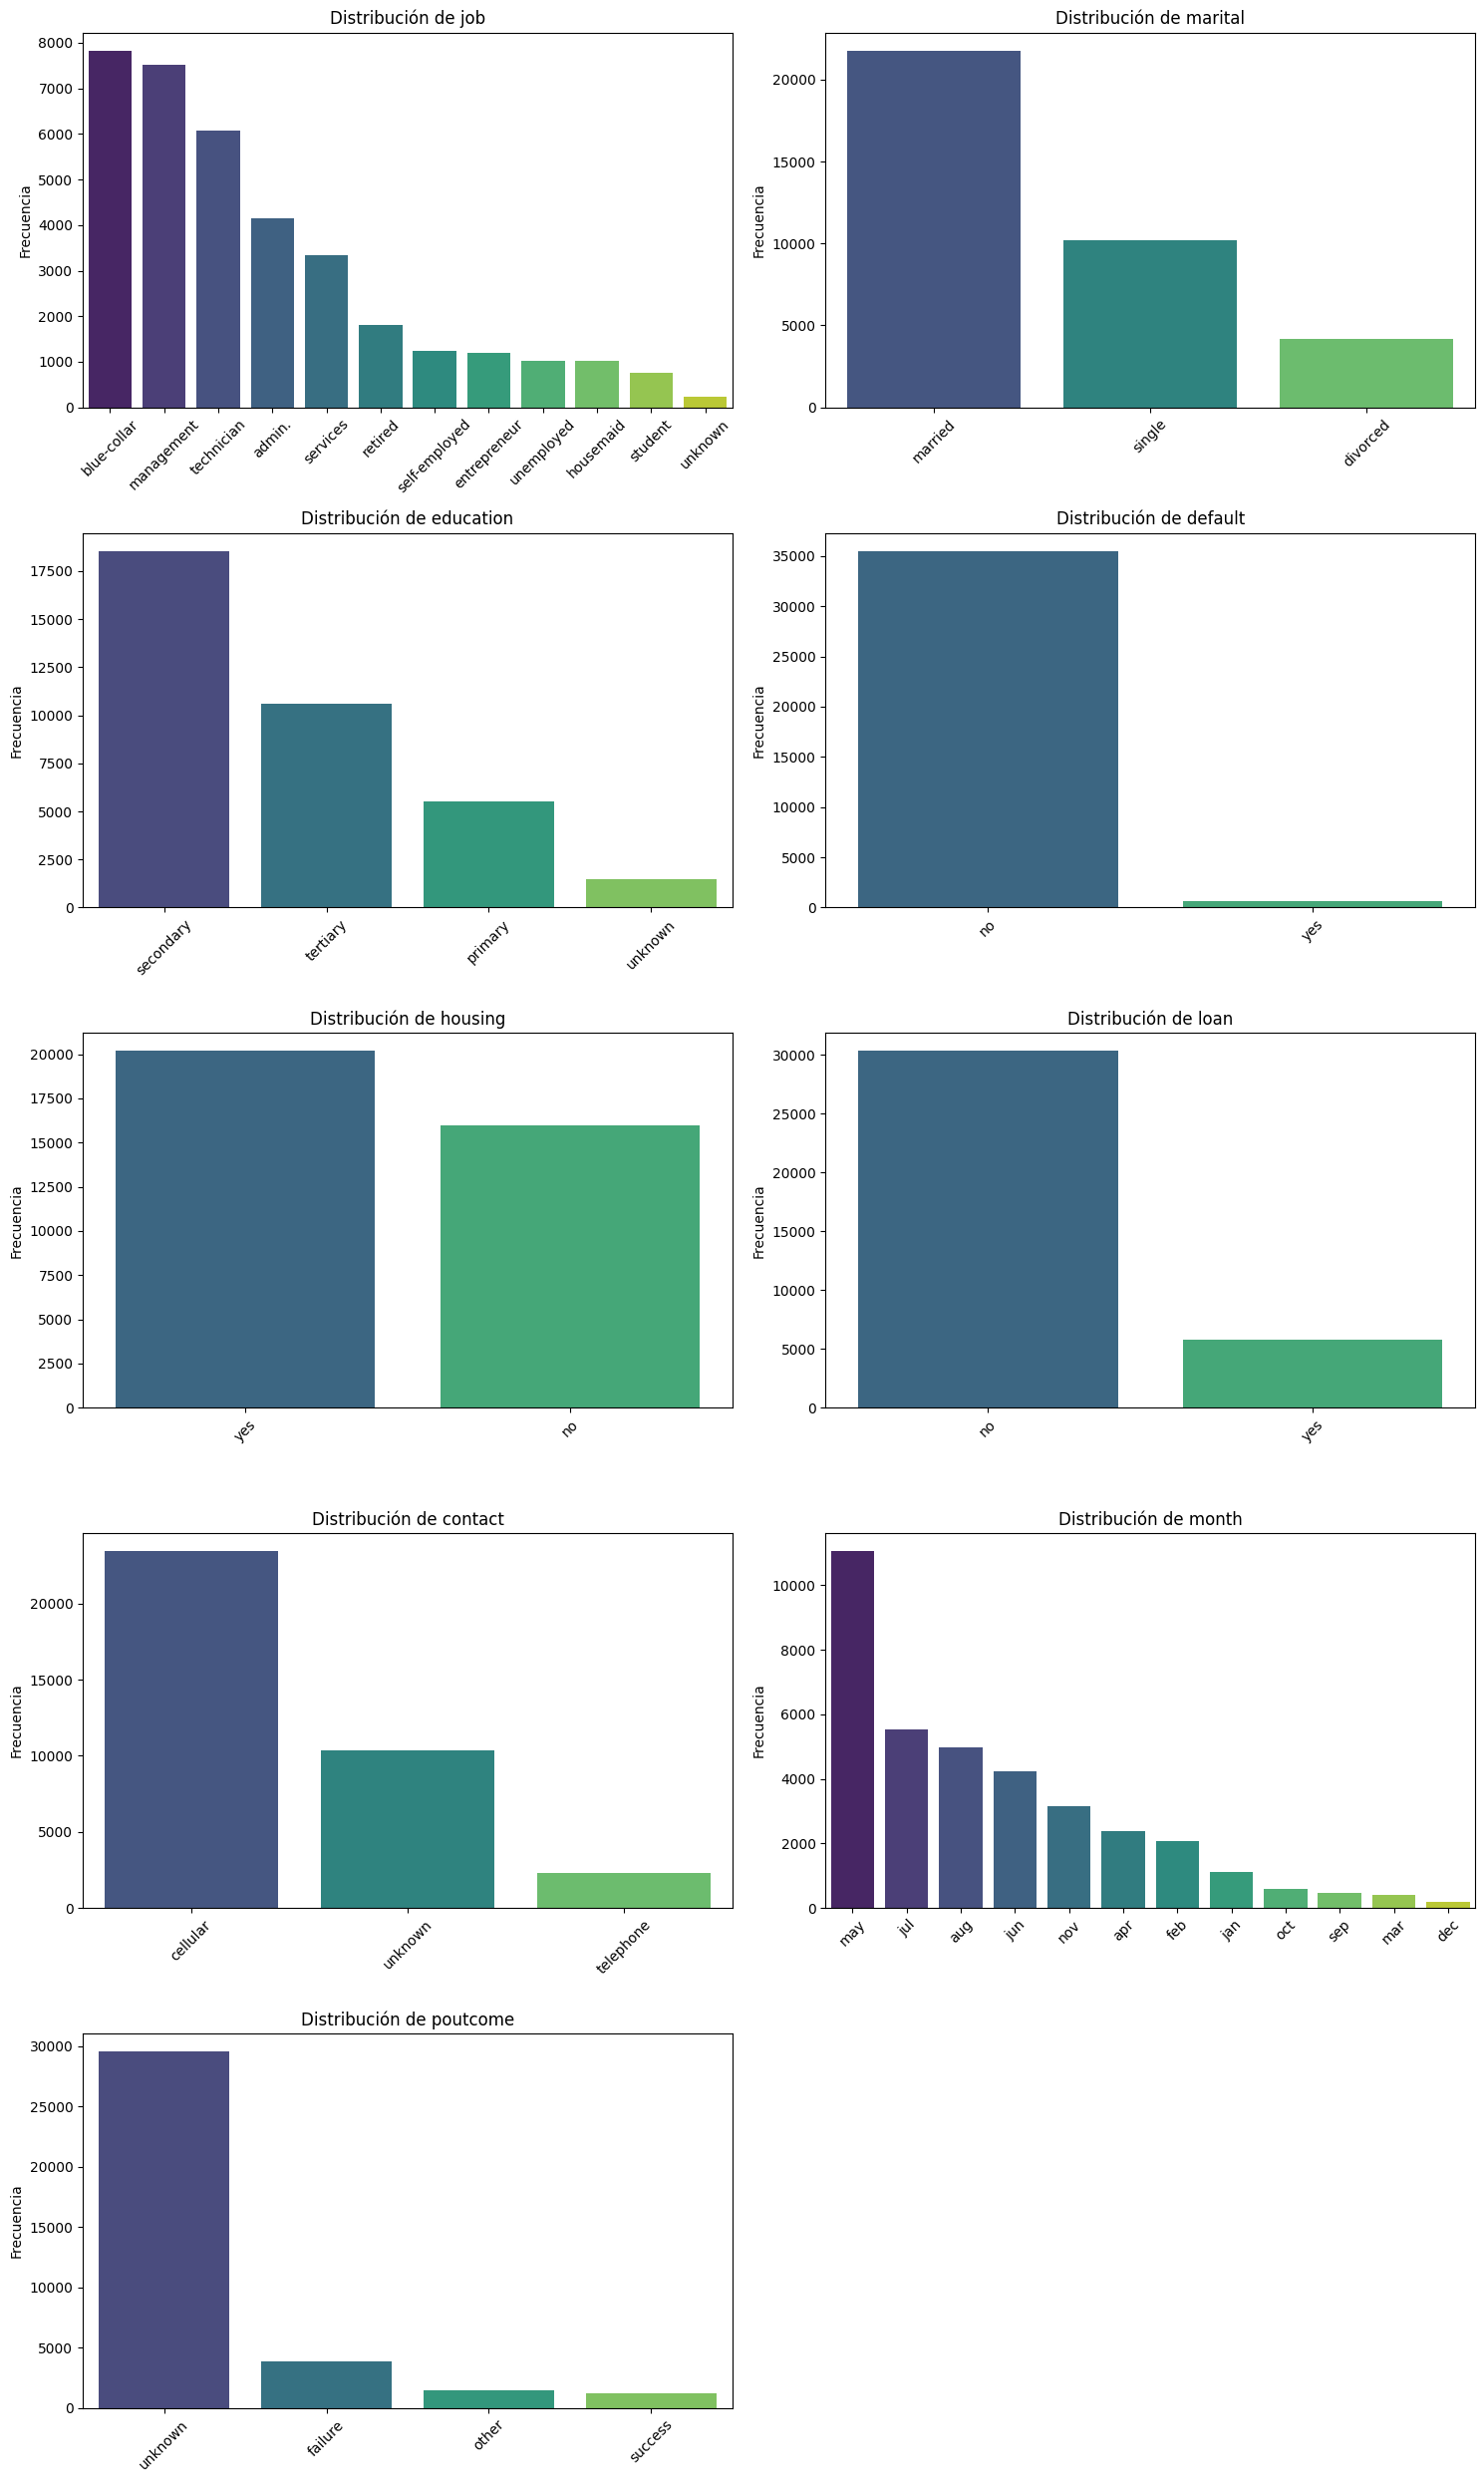

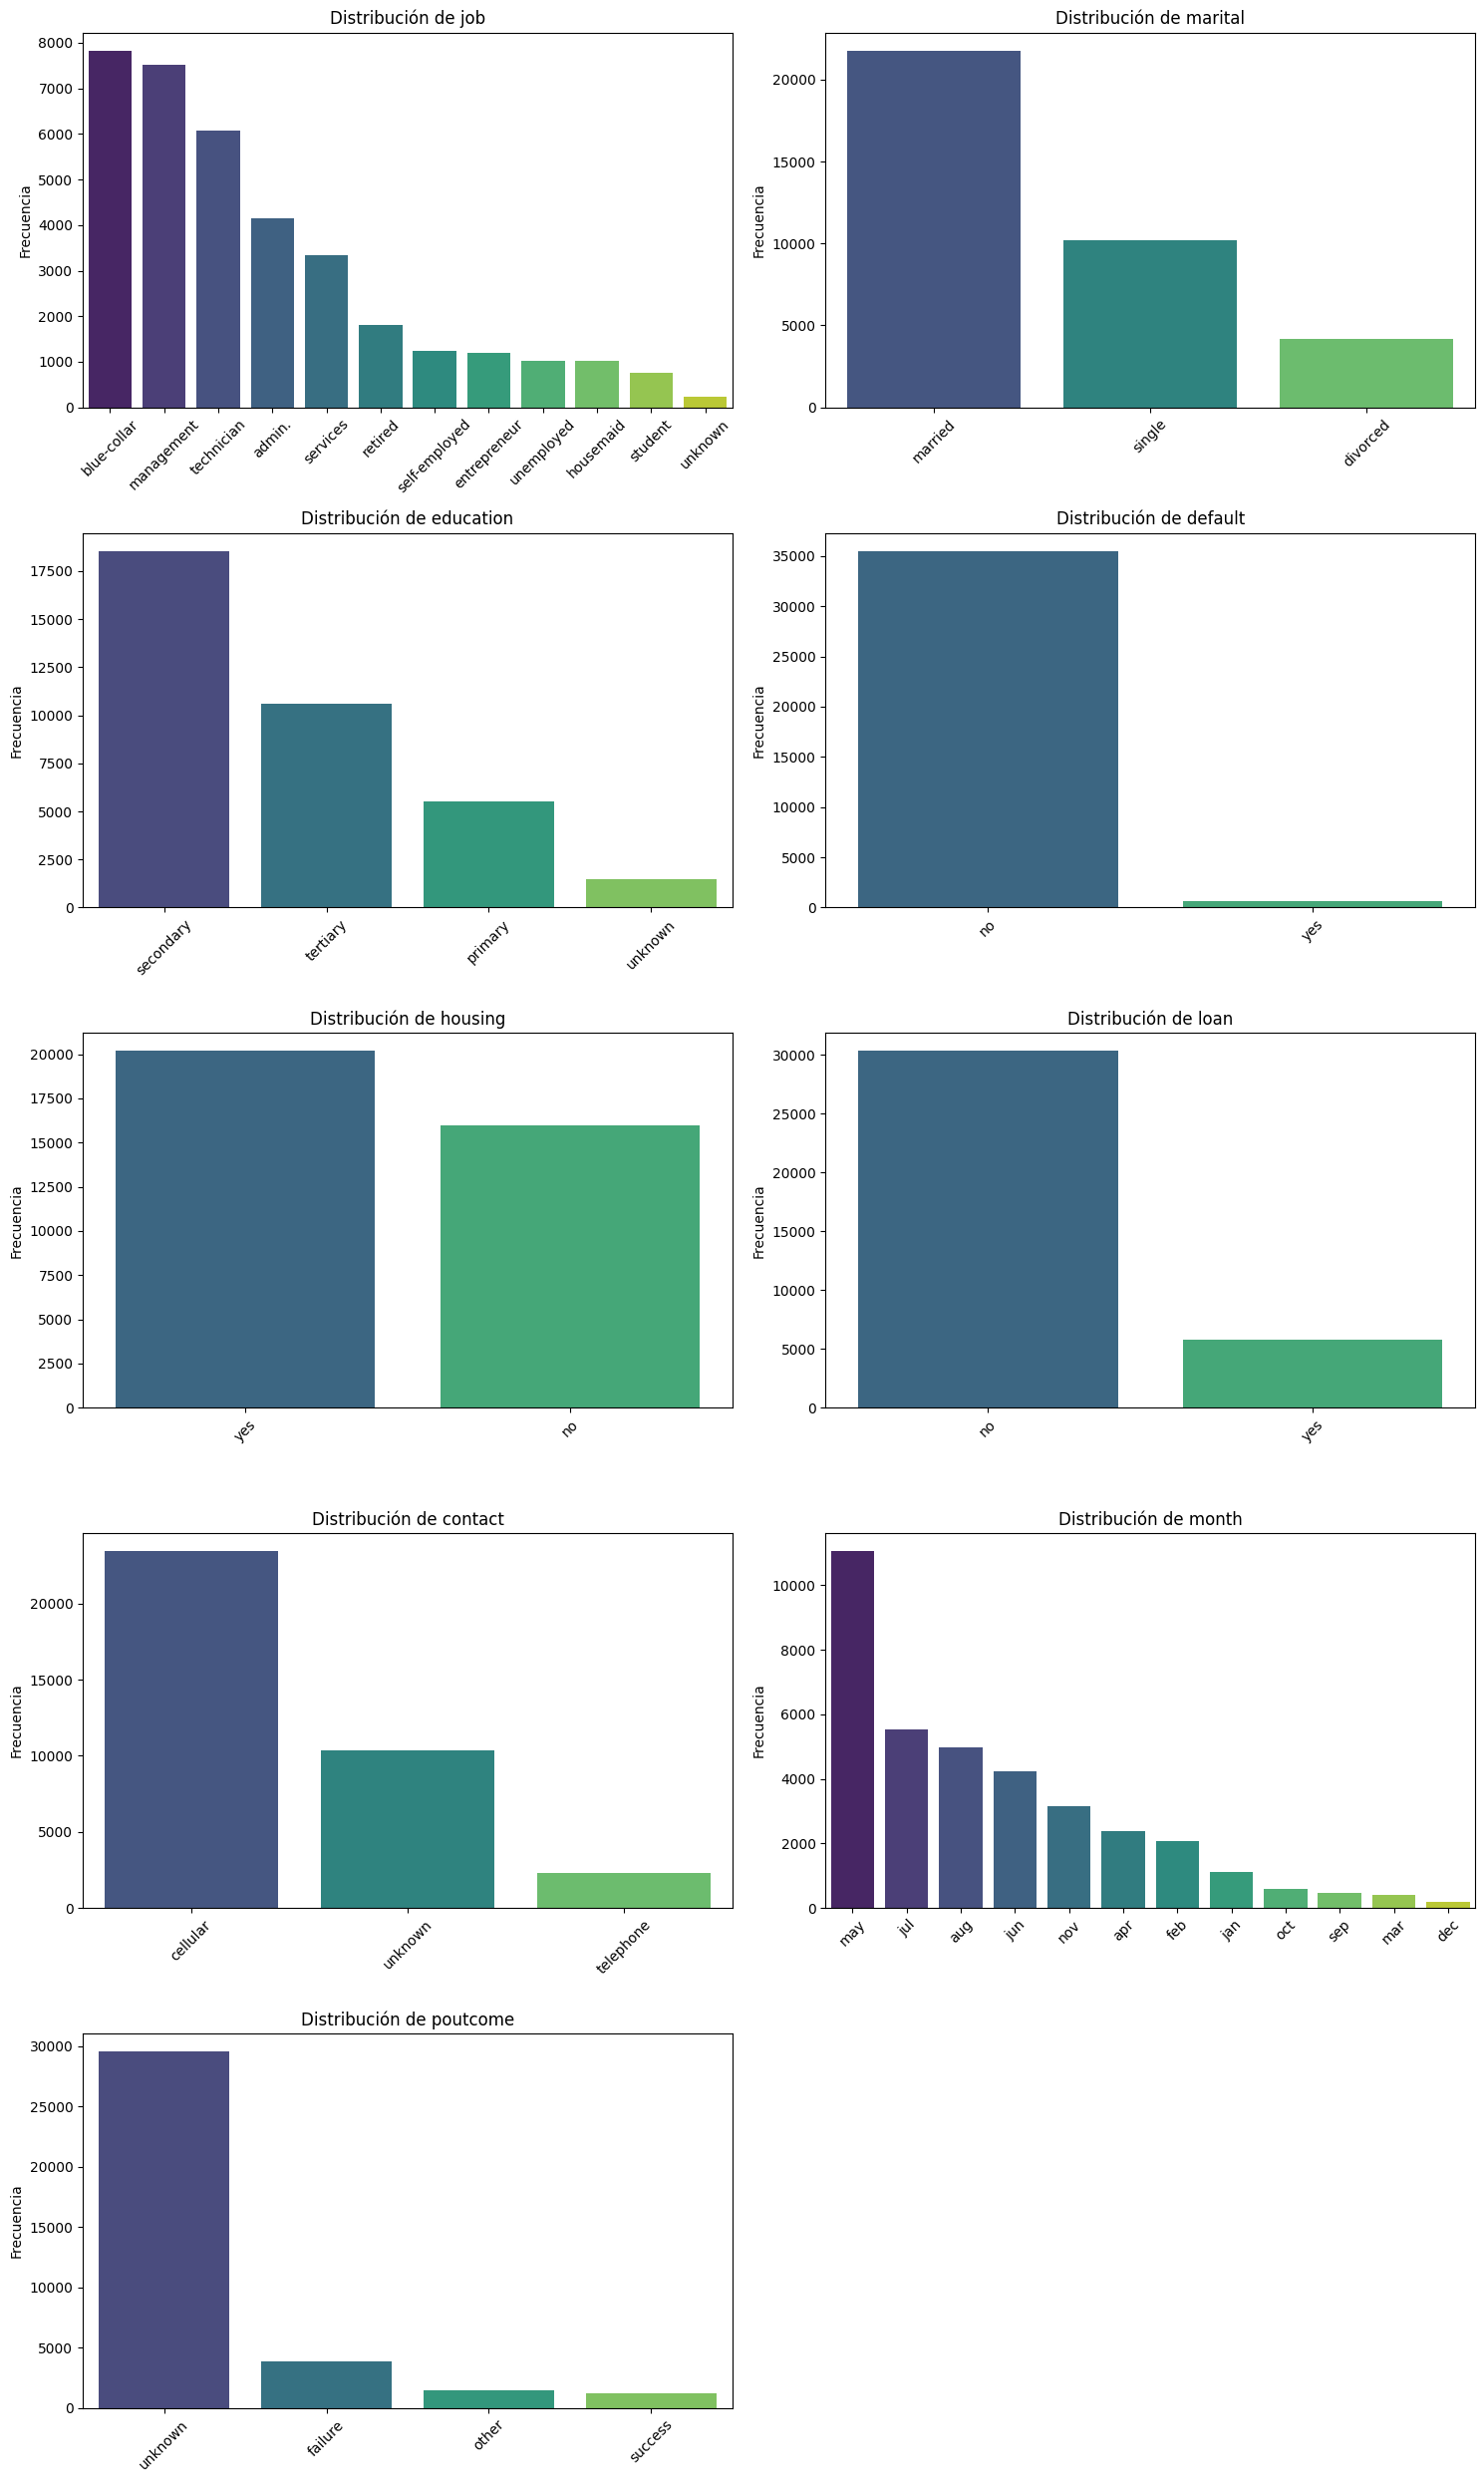

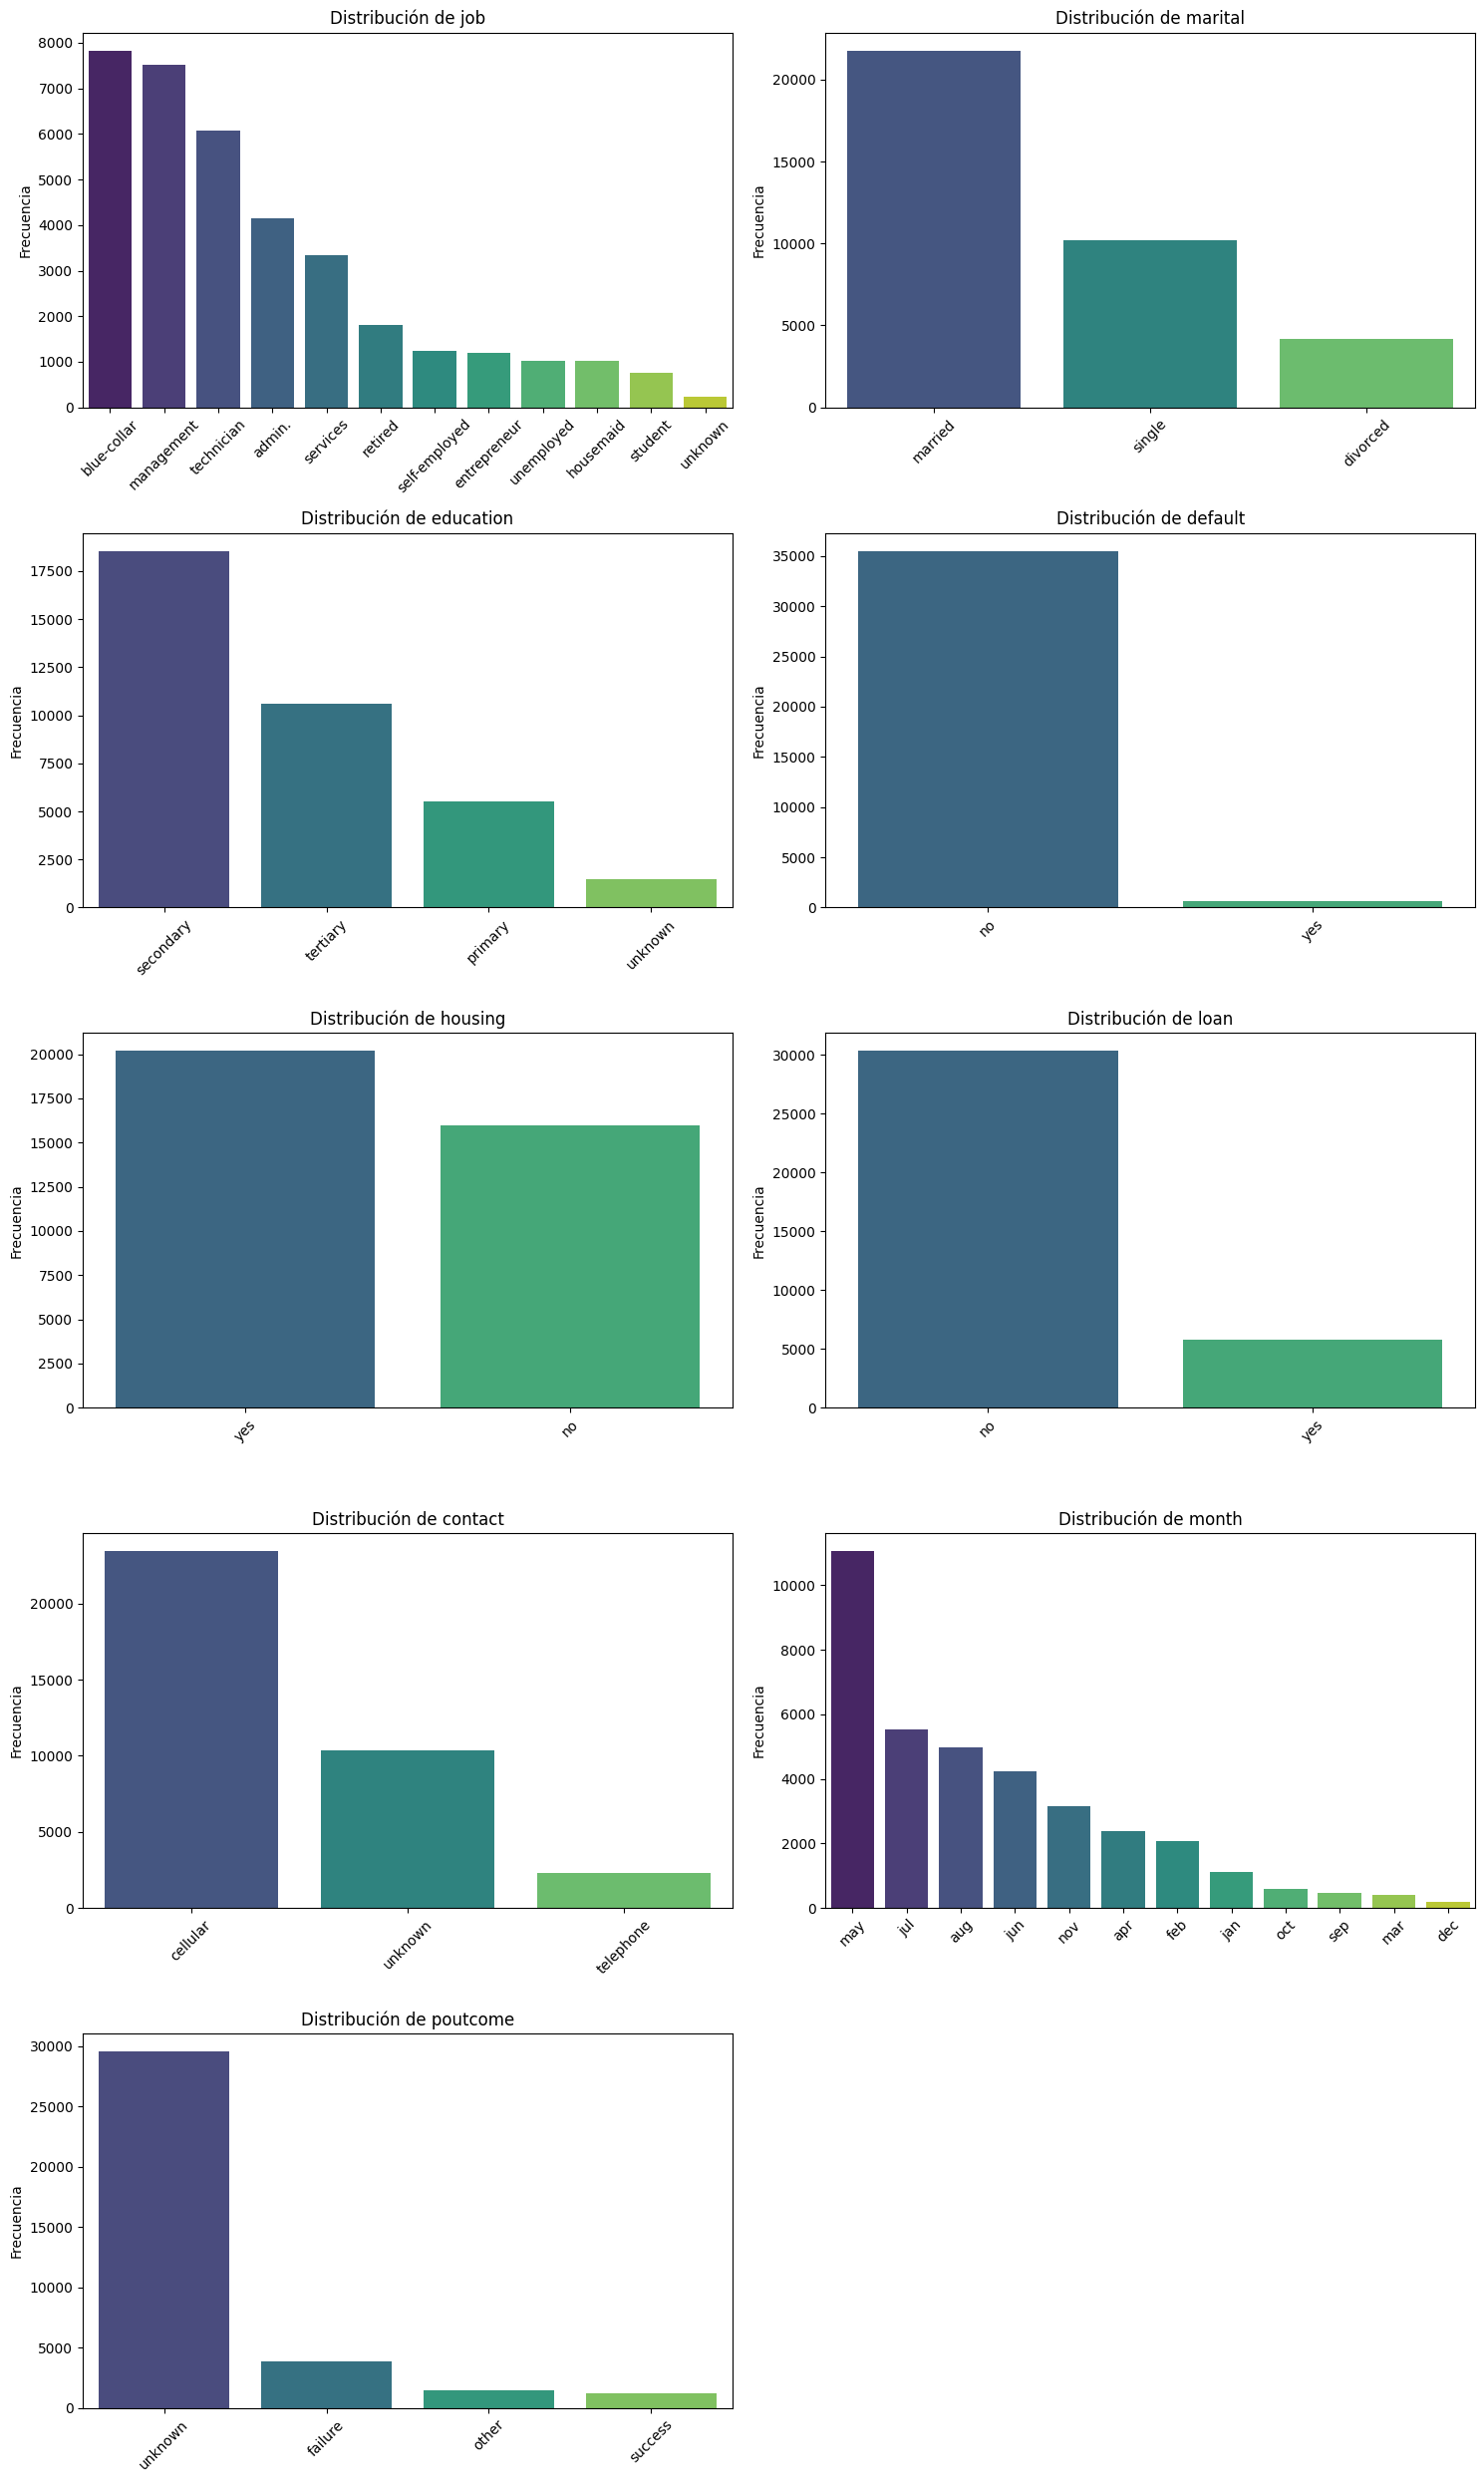

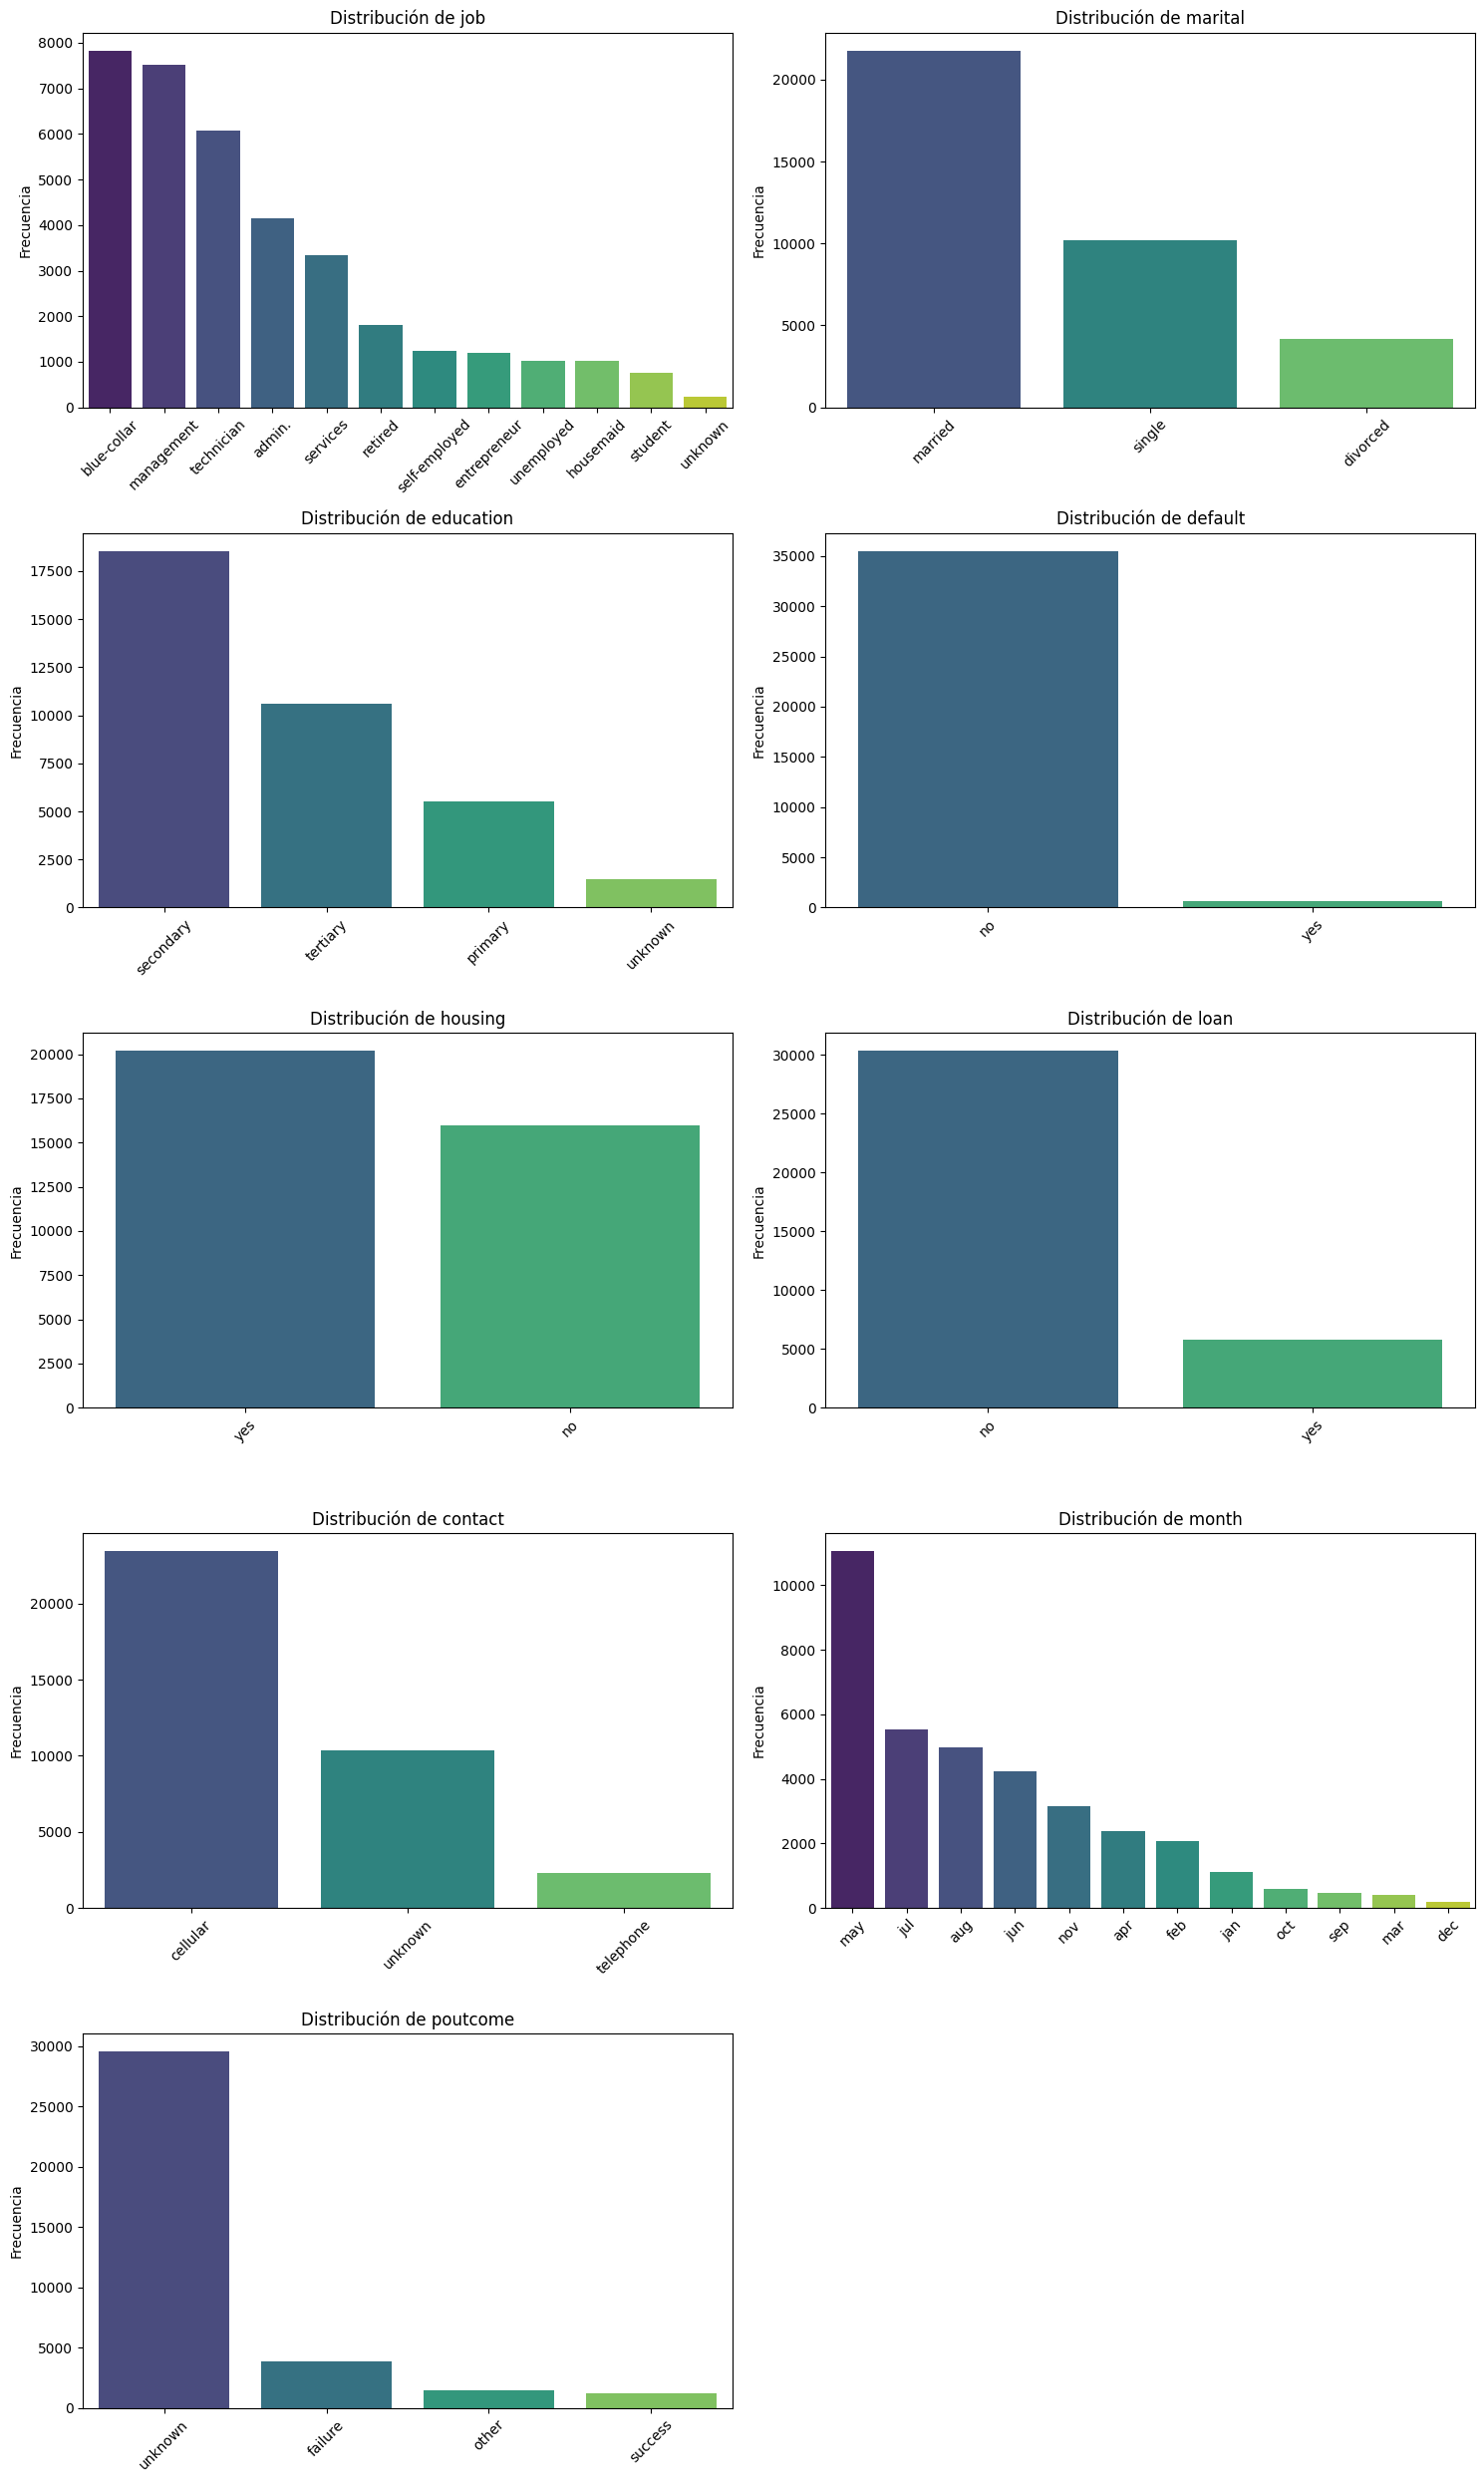

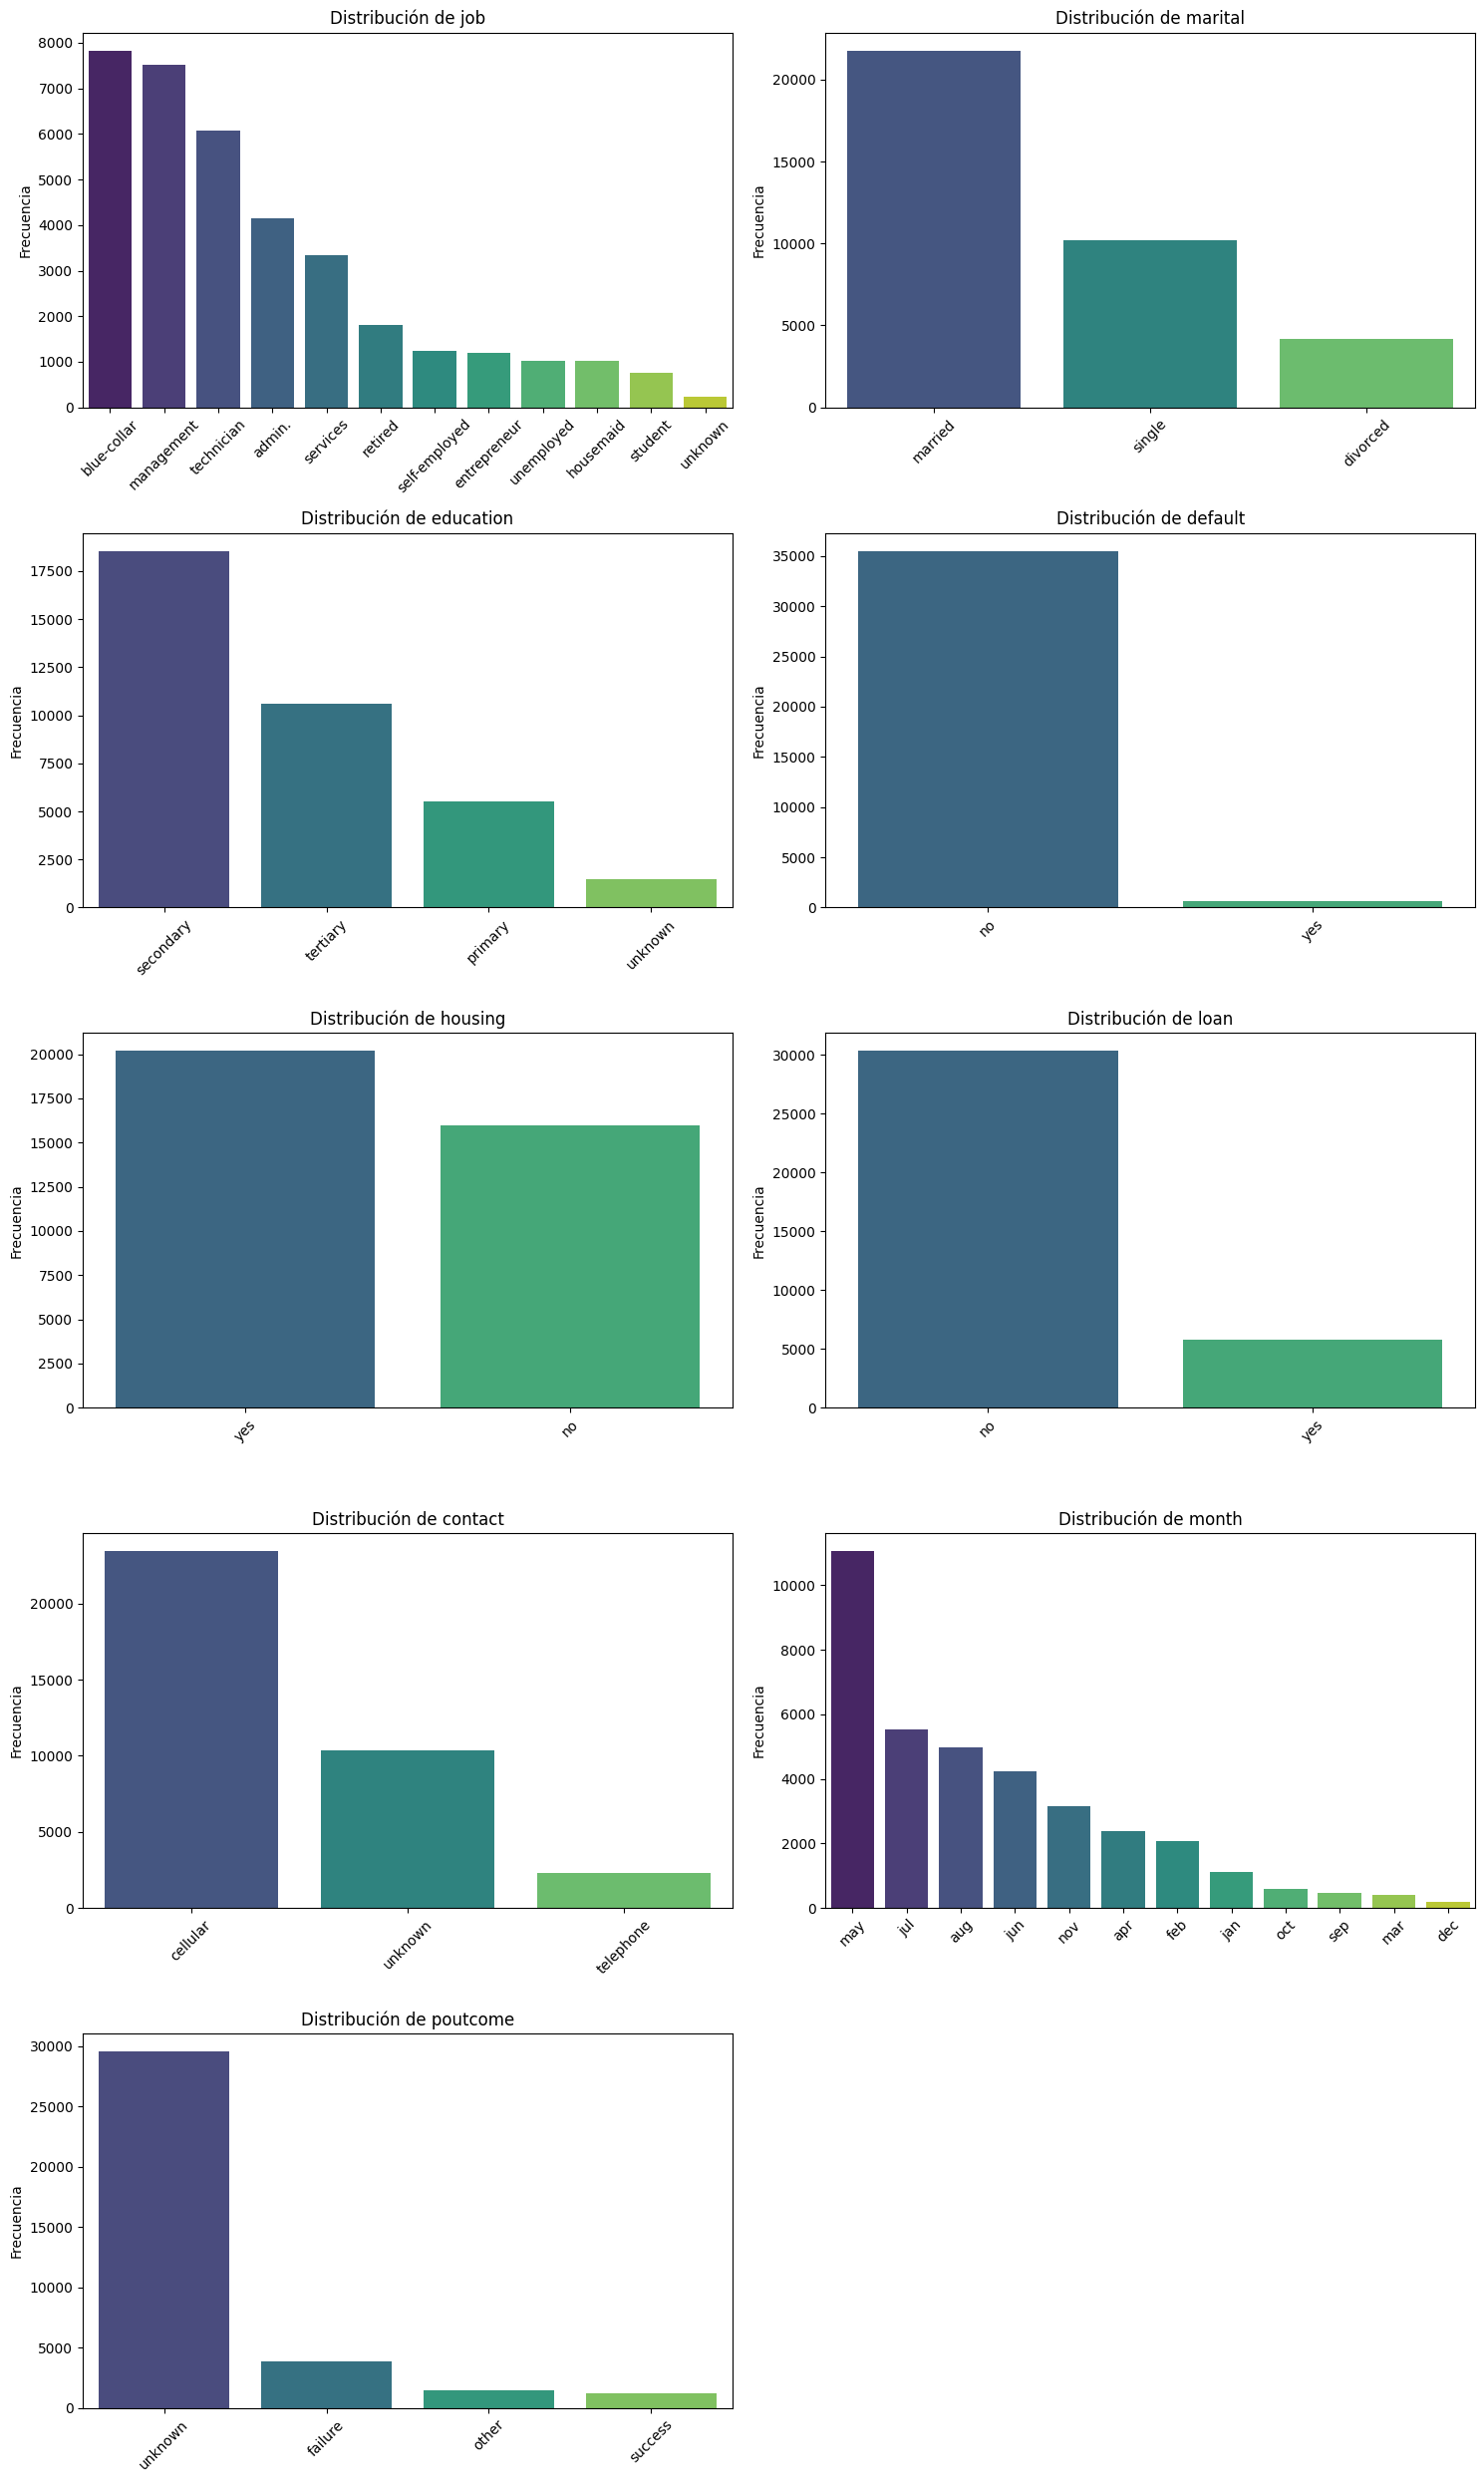

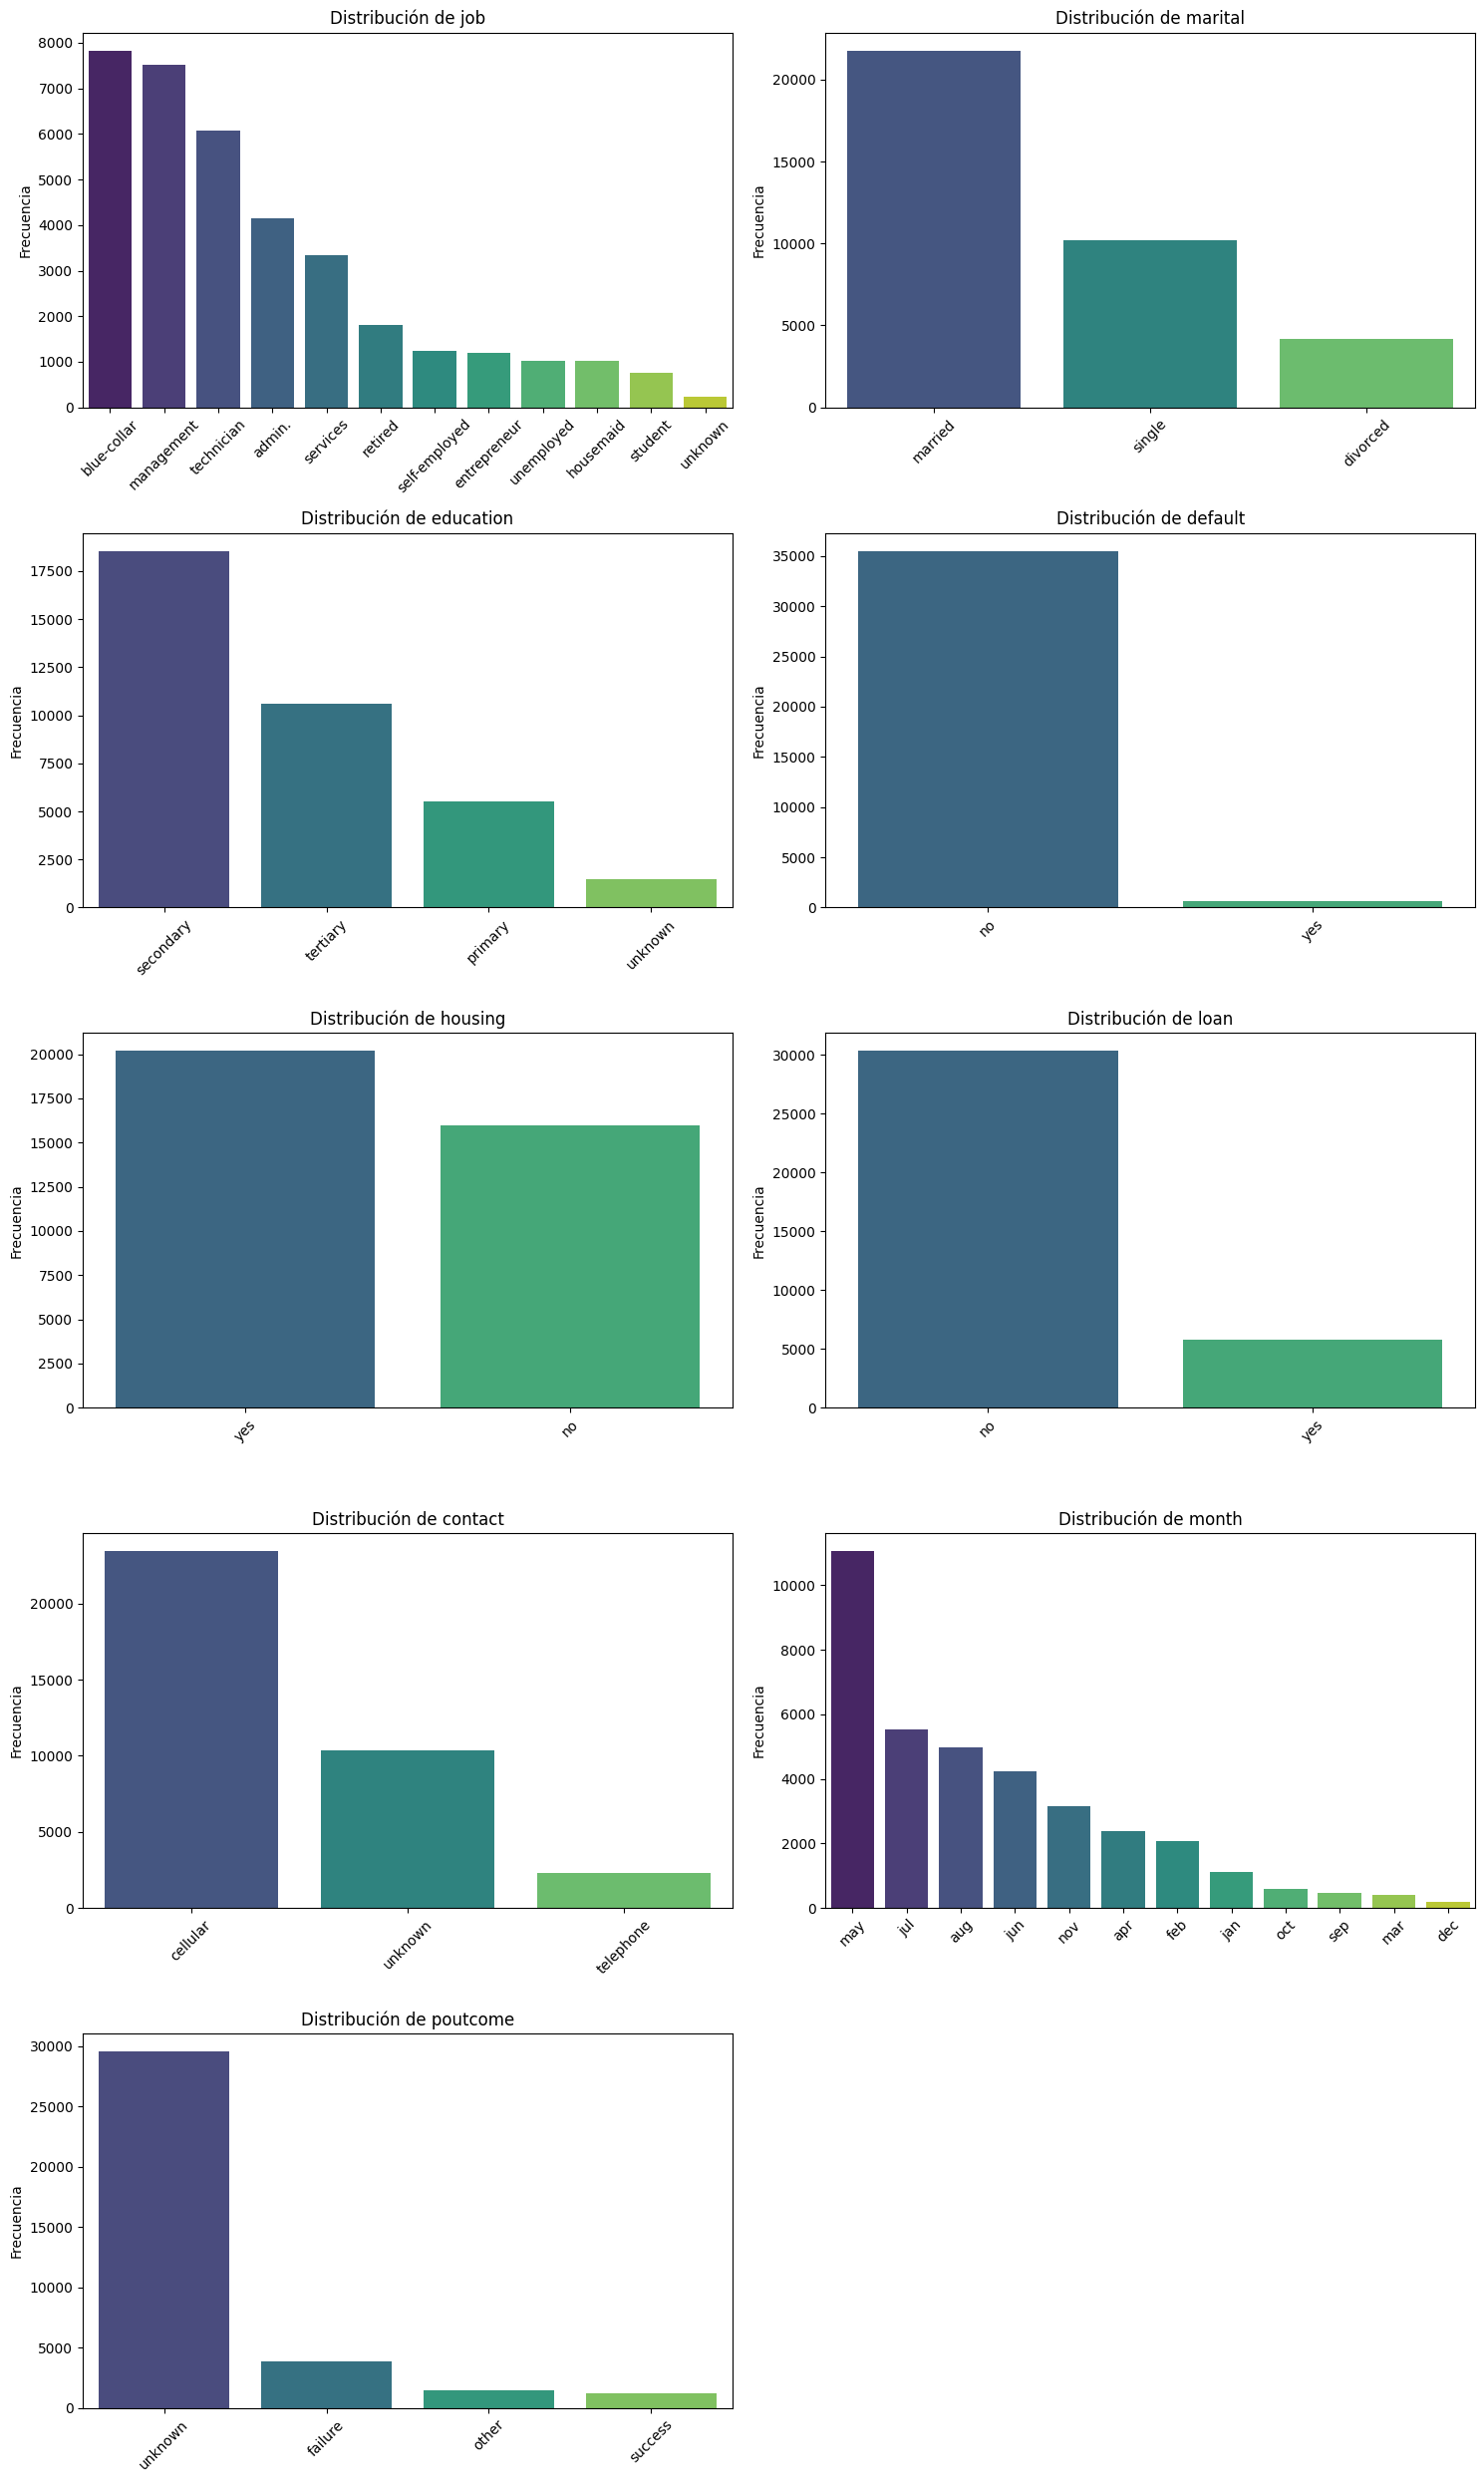

In [28]:
import bootcampviztools as ml
for feat in features_cat:
    ml.pinta_distribucion_categoricas(train_set, features_cat, relativa=False, mostrar_valores=False)

### Elección de categóricas y tratamiento: 
Me quedaré para convertir a numéricas:
- job, marital, education, housing, loan, contact, poutcome.
- loan y housing son binarias.
- Por la cantidad de valores distintos que tiene el resto, usaré one-hot para todas menos para education.
- education tiene un orden concreto, la convertiré a numérica pero no con one-hot sino con un orden concreto.

In [18]:
# loan y housing tienen dos valores, son binarias, las pasaré a 0 y 1:
features_bin = ['loan', 'housing']

train_set["loan"] = train_set["loan"].map({'no': 0, 'yes': 1})
train_set["housing"] = train_set["housing"].map({'no': 0, 'yes': 1})    

test_set["loan"] = test_set["loan"].map({'no': 0, 'yes': 1})
test_set["housing"] = test_set["housing"].map({'no': 0, 'yes': 1})


In [19]:
# one hot para: job, marital, contact, poutcome:
features_onehot = ['job', 'marital', 'contact', 'poutcome']
train_set = pd.get_dummies(train_set, columns=features_onehot, drop_first=True)

# Ponemos el mismo índice en test para que tenga las mismas columnas que train
test_set = pd.get_dummies(test_set, columns=features_onehot, drop_first=True)
test_set = test_set.reindex(columns=train_set.columns, fill_value=0)

In [20]:
# education será con ordinal encoding:
train_set["education"].unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [21]:
# y lo convertimos con ordinal encoder:
features_ordinal = ['education']
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary', 'unknown']])
train_set[features_ordinal] = ordinal_encoder.fit_transform(train_set[features_ordinal])
test_set[features_ordinal] = ordinal_encoder.transform(test_set[features_ordinal])


In [22]:
features_cat_finales = features_onehot + features_bin + features_ordinal
features_cat_finales

['job', 'marital', 'contact', 'poutcome', 'loan', 'housing', 'education']

In [34]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 24001 to 44229
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                36168 non-null  int64  
 1   education          36168 non-null  float64
 2   default            36168 non-null  object 
 3   balance            36168 non-null  int64  
 4   housing            36168 non-null  int64  
 5   loan               36168 non-null  int64  
 6   day                36168 non-null  int64  
 7   month              36168 non-null  object 
 8   duration           36168 non-null  int64  
 9   campaign           36168 non-null  int64  
 10  pdays              36168 non-null  int64  
 11  previous           36168 non-null  int64  
 12  y                  36168 non-null  int64  
 13  job_blue-collar    36168 non-null  bool   
 14  job_entrepreneur   36168 non-null  bool   
 15  job_housemaid      36168 non-null  bool   
 16  job_management     3616

In [35]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9043 entries, 1392 to 31033
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                9043 non-null   int64  
 1   education          9043 non-null   float64
 2   default            9043 non-null   object 
 3   balance            9043 non-null   int64  
 4   housing            9043 non-null   int64  
 5   loan               9043 non-null   int64  
 6   day                9043 non-null   int64  
 7   month              9043 non-null   object 
 8   duration           9043 non-null   int64  
 9   campaign           9043 non-null   int64  
 10  pdays              9043 non-null   int64  
 11  previous           9043 non-null   int64  
 12  y                  9043 non-null   int64  
 13  job_blue-collar    9043 non-null   bool   
 14  job_entrepreneur   9043 non-null   bool   
 15  job_housemaid      9043 non-null   bool   
 16  job_management     9043 n

In [ ]:
# ahora vamos a quedarnos solo las features:

cols_no_features = ["default", "month", "duration", "y"] # defino las que no quiero
features_definitivas = train_set.drop(columns=cols_no_features).columns # y las borro en el train
features_definitivas

Index(['age', 'education', 'balance', 'housing', 'loan', 'day', 'campaign',
       'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [ ]:
# dividimos entre x e y:
X_train = train_set[features_definitivas] # ya las tengo aqui
y_train = train_set[target]

X_test = test_set[features_definitivas] # y por ende son las que usa el test
y_test = test_set[target]

In [28]:
# creamos modelo y entrenamos:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Y hacemos las evaluaciones contra test:
# y_pred es la predicción de la clase, se usa para accuracy, confusion matrix, precision, recall y f1-score
y_pred = tree_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(9043,))

In [ ]:
# métricas completas y clásicas:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# accuracy es la proporción de predicciones correctas
# confusion_matrix muestra los aciertos y errores por clase
# clasification_report nos da métricas mas completas

Accuracy: 0.8232887316156143
Confusion matrix:
 [[7131  854]
 [ 744  314]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7985
           1       0.27      0.30      0.28      1058

    accuracy                           0.82      9043
   macro avg       0.59      0.59      0.59      9043
weighted avg       0.83      0.82      0.83      9043



In [35]:
# y_pred_prob devuelve la probabilidad de que la clase sea 1,
# se usa para curva ROC/AUC
y_pred_prob = tree_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0., 0., 0., ..., 0., 0., 0.], shape=(9043,))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)
# mide qué tan bien separa el modelo las dos clases

ROC AUC: 0.5949179285830118


## Análisis del modelo baseline:
- El modelo acierta en 82% de los casos totales.
- Recordemos que es un dataset desbalanceado en el que prevalece el no (0).
- en la matriz de confusión: 7131 veces predijo 0 y era 0, y 314 veces predijo 1 y era 1; 854 veces predijo 1 y era 0, y 744 veces predijo 0 y era 1. Los true positives son muy pocos frente a los true negatives. Y viendo los falsos negativos (744) y los falsos positivos (854), el modelo no predice bien la clase 1.

- Precisión: de sus predicciones como 1, solo el 27% realmente lo eran; frente a su predicción de 0 que es del 91%.
- Recall: De los valores reales, detectó en un 89% los 0, y 30% los 1.
- F1-score: En un 90% la media de 0, en un 28% la media de 1.
- No clasifica bien la clase 1 pero predice bien la clase 0, por estar desbalanceado.
- ROC/AUC: 59%, el modelo predice casi siempre 0, no distingue bien las clases. 

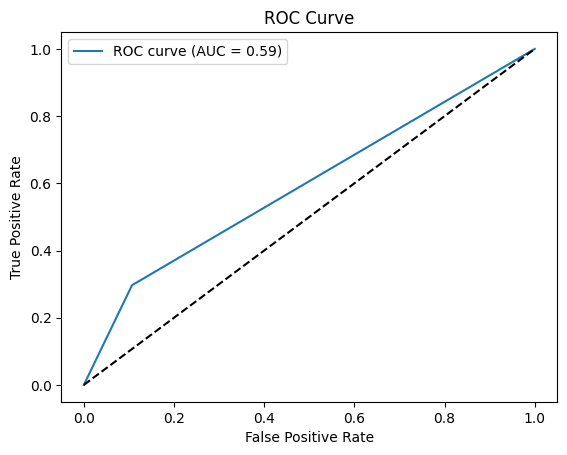

In [38]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [39]:
# Un AUC de 0.59 indica que el modelo no predice tan bien. Es casi un 50/50.

In [40]:
# Vamos a optimizar hiperparámetros, teniendo en cuenta que el dataset no es muy 
# grande y complejo:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# usaré un grid search y sigue estos pasos:
# 1. definir el grid de hiperparámetros:
param_grid = {
    'max_depth': [3, 5, 7, 10, None], # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 5, 10], # mínimo de muestras en una hoja
    'criterion': ['gini', 'entropy'], # función de división de nodos
    'class_weight': [None, 'balanced'] # ajustar para clases desbalanceadas
}
# estos rangos pequeños y medianos evitan overfitting y underfitting
# class_weight ayudará porque el dataset está desbalanceado


In [41]:
# 2. creamos el gridsearch:
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, # cross-validation 5-fold divide X_train / y_train en 5 partes para validar internamente
    scoring='roc_auc', # métrica a optimizar (mejor para clases desbalanceadas)
    n_jobs=-1
)


In [42]:
# 3. entrenams el gridsearch:
grid_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [ ]:
print("Mejores parámetros:", grid_search.best_params_) # diccionario con valores de hiperparámetros que dieron el mejor resultado
print("Mejor score CV:", grid_search.best_score_) # mejor puntuación promedio de CV usando estos hiperparámetros
print("Mejor estimador:", grid_search.best_estimator_.score(X_test,y_test)) 


Mejores parámetros: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
Mejor score CV: 0.7360324297013952
Mejor estimador: 0.8924029636182683


In [44]:
# aqui tengo mi modelo completo entrenado con los hiperparámetros que puse:
best_tree = grid_search.best_estimator_ # y ya lo puedo usar en test

In [45]:
y_pred = best_tree.predict(X_test)
y_pred_prob = best_tree.predict_proba(X_test)[:,1]

In [46]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8924029636182683
Confusion matrix:
 [[7911   74]
 [ 899  159]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.68      0.15      0.25      1058

    accuracy                           0.89      9043
   macro avg       0.79      0.57      0.59      9043
weighted avg       0.87      0.89      0.86      9043



In [ ]:
# y_pred_prob devuelve la probabilidad de que la clase sea 1
y_pred_prob = best_tree.predict_proba(X_test)[:,1]
y_pred_prob

array([0.03208556, 0.01654412, 0.        , ..., 0.06342401, 0.14227642,
       0.06342401], shape=(9043,))

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)
# mide qué tan bien separa el modelo las dos clases

ROC AUC: 0.7357321087625308


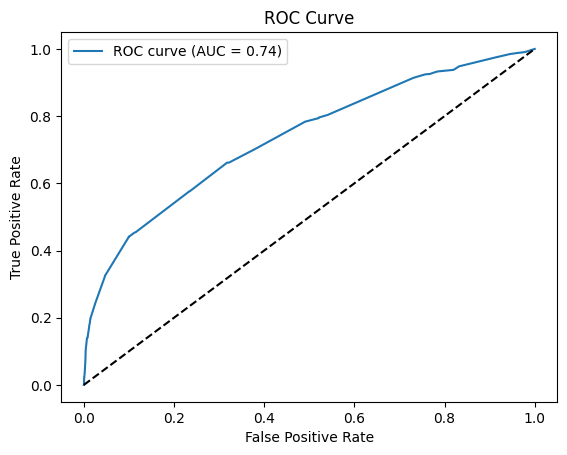

In [49]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # línea diagonal (azar)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show();

## Análisis del modelo tras el Grid Search:
- Se ha mejorado el accuracy de un 82% a un 89%, con lo que identifica mucho mejor el valor 0.
- Aun así, le sigue costando identificar el valor 1. La detección de casos reales de 1 ha bajado de un 30% a un 15%.
- El f1 score sigue siendo bajo,pasando de un 28% en el modelo base a un 25% con este modelo. 
- La probabilidad de que la clase sea 1 ha aumentado respecto al baseline.
- El ROC AUC subió de un 59 a 74. Es ligeramente mejor, tal y como se aprecia en la curva, que también ha cambiado.
- El modelo predice 0 con mayor seguridad, pero predice también 1 cuando está muy seguro de que lo es. No olvidemos que es un dataset desbalanceado y esto tiene influcencia.